# Title Race Analysis - Israeli Premier League
## ניתוח מרוץ האליפות - ליגת העל

This notebook analyzes leadership changes throughout the season in the Israeli Premier League from 2006/07 to 2024/25.

## 1. Environment Setup

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Support Hebrew text in plots
plt.rcParams['font.family'] = 'DejaVu Sans'

# Helper to find project root
def _find_root(start=None):
    p = start or Path.cwd()
    for _ in range(6):
        if (p / 'data').exists() or (p / '.git').exists() or (p / 'notebooks').exists():
            return p
        p = p.parent
    return Path.cwd()

# Setup paths
ROOT = _find_root()
INTERIM_DIR = ROOT / 'data' / 'interim'
FIG_DIR = ROOT / 'reports' / 'figures'
FIG_DIR.mkdir(parents=True, exist_ok=True)

print(f"✅ Environment setup complete")
print(f"   ROOT: {ROOT}")
print(f"   INTERIM_DIR: {INTERIM_DIR}")
print(f"   FIG_DIR: {FIG_DIR}")

✅ Environment setup complete
   ROOT: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks
   INTERIM_DIR: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\data\interim
   FIG_DIR: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures


## 2. Load Data

In [28]:
# Load the per-round data (round-by-round leadership)
per_round_df = pd.read_csv(INTERIM_DIR / 'tm_title_race_per_round.csv')

# Load the summary data (leadership changes per season)
summary_df = pd.read_csv(INTERIM_DIR / 'tm_title_race_summary_all_seasons.csv')

# Load playoff data
playoff_summary_df = pd.read_csv(INTERIM_DIR / 'playoff_championship_leadership_changes.csv')
playoff_per_round_df = pd.read_csv(INTERIM_DIR / 'playoff_championship_per_round.csv')

print(f"✅ Loaded data successfully:")
print(f"   Regular season per-round: {len(per_round_df)} rows, {per_round_df['season'].nunique()} seasons")
print(f"   Regular season summary: {len(summary_df)} seasons")
print(f"   Playoff summary: {len(playoff_summary_df)} seasons")
print(f"   Playoff per-round: {len(playoff_per_round_df)} rows")

# Display summary
print(f"\n📊 Season range: {summary_df['season'].min()} to {summary_df['season'].max()}")
display(summary_df.head(10))

✅ Loaded data successfully:
   Regular season per-round: 538 rows, 20 seasons
   Regular season summary: 20 seasons
   Playoff summary: 16 seasons
   Playoff per-round: 163 rows

📊 Season range: 2006/07 to 2025/26


,season,leadership_changes,first_leader,last_leader,last_round,distinct_leaders
0,2006/07,5,H. Kfar Saba,B. Jerusalem,33,4
1,2007/08,0,B. Jerusalem,B. Jerusalem,33,1
2,2008/09,8,Maccabi Haifa,Maccabi Haifa,33,3
3,2009/10,1,Bnei Yehuda,Maccabi Haifa,30,2
4,2010/11,12,Maccabi Netanya,Maccabi Haifa,30,6
5,2011/12,7,Hapoel Tel Aviv,Kiryat Shmona,30,3
6,2012/13,7,FC Ashdod,M. Tel Aviv,26,3
7,2013/14,2,Maccabi Haifa,M. Tel Aviv,26,3
8,2014/15,7,Hapoel Raanana,M. Tel Aviv,26,3
9,2015/16,5,Bnei Yehuda,H. Beer Sheva,26,4


## 3. Analysis: Leadership Stability Metrics

### 3.1. How Many Rounds Each Team Led Per Season (יציבות הובלה)

📊 Top 3 teams by rounds led per season:

2006/07:
  B. Jerusalem: 29 rounds
  H. Kfar Saba: 2 rounds
  Hapoel Tel Aviv: 1 rounds

2007/08:
  B. Jerusalem: 33 rounds

2008/09:
  Maccabi Haifa: 26 rounds
  Maccabi Netanya: 5 rounds
  Hapoel Tel Aviv: 2 rounds

2009/10:
  Maccabi Haifa: 28 rounds
  Bnei Yehuda: 2 rounds

2010/11:
  Maccabi Haifa: 16 rounds
  Kiryat Shmona: 7 rounds
  Hapoel Tel Aviv: 3 rounds

2011/12:
  Kiryat Shmona: 16 rounds
  Hapoel Tel Aviv: 8 rounds
  M. Tel Aviv: 6 rounds

2012/13:
  M. Tel Aviv: 17 rounds
  FC Ashdod: 8 rounds
  Hapoel Tel Aviv: 1 rounds

2013/14:
  M. Tel Aviv: 24 rounds
  H. Beer Sheva: 1 rounds
  Maccabi Haifa: 1 rounds

2014/15:
  M. Tel Aviv: 15 rounds
  Kiryat Shmona: 10 rounds
  Hapoel Raanana: 1 rounds

2015/16:
  H. Beer Sheva: 15 rounds
  M. Tel Aviv: 6 rounds
  M. Petah Tikva: 4 rounds

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\rounds_led_heatmap.png
💾 Saved: c:\Users\nitib\dev-lab\

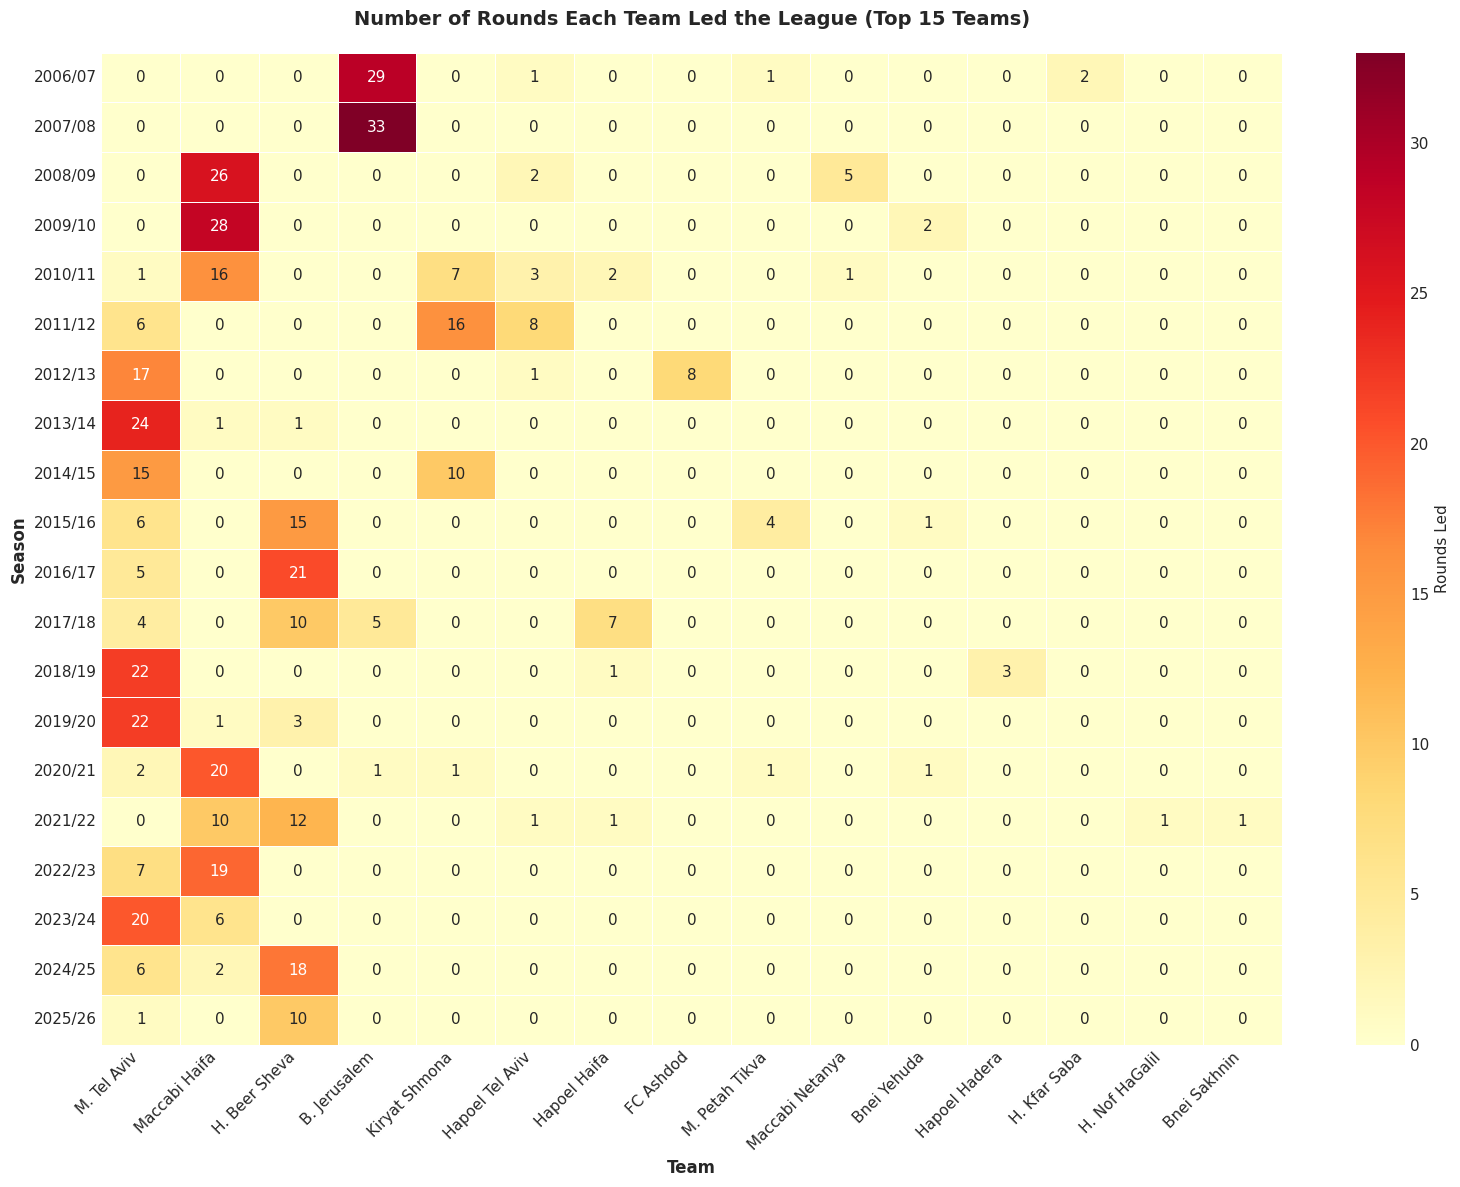


📋 Total Rounds Led Across All Seasons (Top 10):


,Team,Total Rounds Led
0,M. Tel Aviv,158
1,Maccabi Haifa,129
2,H. Beer Sheva,90
3,B. Jerusalem,68
4,Kiryat Shmona,34
5,Hapoel Tel Aviv,16
6,Hapoel Haifa,11
7,FC Ashdod,8
8,Maccabi Netanya,6
9,M. Petah Tikva,6


In [29]:
# Calculate how many rounds each team led in each season
rounds_led = per_round_df.groupby(['season', 'leader']).size().reset_index(name='rounds_led')

# Create pivot table for visualization
rounds_led_pivot = rounds_led.pivot(index='season', columns='leader', values='rounds_led').fillna(0)

# Display top leaders per season
print("📊 Top 3 teams by rounds led per season:\n")
for season in summary_df['season'].head(10):
    season_data = rounds_led[rounds_led['season'] == season].sort_values('rounds_led', ascending=False).head(3)
    print(f"{season}:")
    for _, row in season_data.iterrows():
        print(f"  {row['leader']}: {int(row['rounds_led'])} rounds")
    print()

# Create visualization - heatmap of rounds led
fig, ax = plt.subplots(figsize=(16, 12))

# Select top teams by total rounds led across all seasons
top_teams = rounds_led.groupby('leader')['rounds_led'].sum().sort_values(ascending=False).head(15).index
rounds_led_top = rounds_led[rounds_led['leader'].isin(top_teams)]
rounds_led_pivot_top = rounds_led_top.pivot(index='season', columns='leader', values='rounds_led').fillna(0)

# Sort columns by total rounds led
col_order = rounds_led_pivot_top.sum().sort_values(ascending=False).index
rounds_led_pivot_top = rounds_led_pivot_top[col_order]

sns.heatmap(rounds_led_pivot_top, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Rounds Led'}, linewidths=0.5, ax=ax)
ax.set_title('Number of Rounds Each Team Led the League (Top 15 Teams)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Team', fontsize=12, fontweight='bold')
ax.set_ylabel('Season', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
fig_path = FIG_DIR / 'rounds_led_heatmap.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")

plt.show()

# Summary table - total rounds led by each team across all seasons
total_rounds_led = rounds_led.groupby('leader')['rounds_led'].sum().sort_values(ascending=False).reset_index()
total_rounds_led.columns = ['Team', 'Total Rounds Led']
print("\n📋 Total Rounds Led Across All Seasons (Top 10):")
display(total_rounds_led.head(10))

### 3.2. Leadership Changes Per Season (חילופי הובלה)

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\leadership_changes_per_season.png


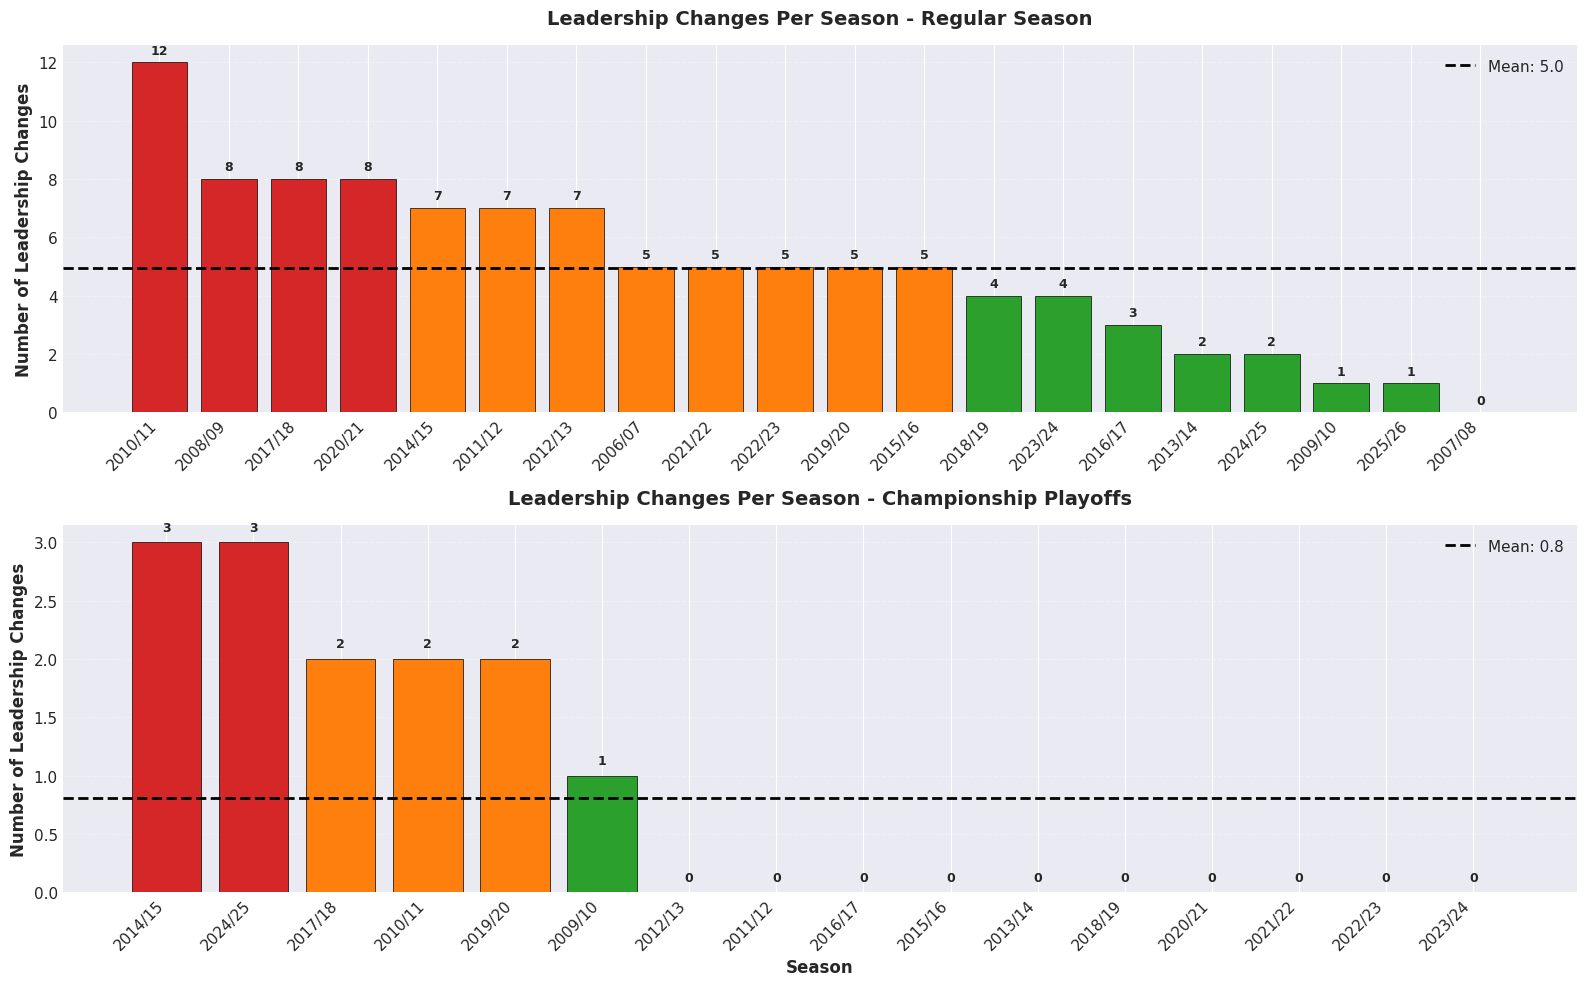


📊 Leadership Changes Statistics:



,Phase,Mean,Median,Min,Max,Std Dev
0,Regular Season,4.9500,5.0,0,12,2.981963
1,Championship Playoffs,0.8125,0.0,0,3,1.167262



🏆 Most Competitive Seasons (Regular):


,season,leadership_changes,distinct_leaders
4,2010/11,12,6
2,2008/09,8,3
11,2017/18,8,4
14,2020/21,8,6
5,2011/12,7,3



😴 Most Stable Seasons (Regular):


,season,leadership_changes,distinct_leaders
1,2007/08,0,1
3,2009/10,1,2
19,2025/26,1,2
7,2013/14,2,3
18,2024/25,2,3


In [30]:
# Visualization: Leadership changes per season
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Regular season
ax1 = axes[0]
summary_sorted = summary_df.sort_values('leadership_changes', ascending=False)
colors = ['#d62728' if x >= 8 else '#ff7f0e' if x >= 5 else '#2ca02c' for x in summary_sorted['leadership_changes']]

ax1.bar(range(len(summary_sorted)), summary_sorted['leadership_changes'], color=colors, edgecolor='black', linewidth=0.5)
ax1.set_xticks(range(len(summary_sorted)))
ax1.set_xticklabels(summary_sorted['season'], rotation=45, ha='right')
ax1.set_ylabel('Number of Leadership Changes', fontsize=12, fontweight='bold')
ax1.set_title('Leadership Changes Per Season - Regular Season', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(summary_sorted['leadership_changes'].mean(), color='black', linestyle='--', linewidth=2, label=f"Mean: {summary_sorted['leadership_changes'].mean():.1f}")
ax1.legend()

# Add value labels on bars
for i, v in enumerate(summary_sorted['leadership_changes']):
    ax1.text(i, v + 0.3, str(int(v)), ha='center', fontsize=9, fontweight='bold')

# Playoff comparison
ax2 = axes[1]
playoff_sorted = playoff_summary_df.sort_values('playoff_leadership_changes', ascending=False)
colors_playoff = ['#d62728' if x >= 3 else '#ff7f0e' if x >= 2 else '#2ca02c' for x in playoff_sorted['playoff_leadership_changes']]

ax2.bar(range(len(playoff_sorted)), playoff_sorted['playoff_leadership_changes'], color=colors_playoff, edgecolor='black', linewidth=0.5)
ax2.set_xticks(range(len(playoff_sorted)))
ax2.set_xticklabels(playoff_sorted['season'], rotation=45, ha='right')
ax2.set_ylabel('Number of Leadership Changes', fontsize=12, fontweight='bold')
ax2.set_xlabel('Season', fontsize=12, fontweight='bold')
ax2.set_title('Leadership Changes Per Season - Championship Playoffs', fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.axhline(playoff_sorted['playoff_leadership_changes'].mean(), color='black', linestyle='--', linewidth=2, label=f"Mean: {playoff_sorted['playoff_leadership_changes'].mean():.1f}")
ax2.legend()

# Add value labels on bars
for i, v in enumerate(playoff_sorted['playoff_leadership_changes']):
    ax2.text(i, v + 0.1, str(int(v)), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
fig_path = FIG_DIR / 'leadership_changes_per_season.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

# Summary statistics table
print("\n📊 Leadership Changes Statistics:\n")
stats_table = pd.DataFrame({
    'Phase': ['Regular Season', 'Championship Playoffs'],
    'Mean': [summary_df['leadership_changes'].mean(), playoff_summary_df['playoff_leadership_changes'].mean()],
    'Median': [summary_df['leadership_changes'].median(), playoff_summary_df['playoff_leadership_changes'].median()],
    'Min': [summary_df['leadership_changes'].min(), playoff_summary_df['playoff_leadership_changes'].min()],
    'Max': [summary_df['leadership_changes'].max(), playoff_summary_df['playoff_leadership_changes'].max()],
    'Std Dev': [summary_df['leadership_changes'].std(), playoff_summary_df['playoff_leadership_changes'].std()],
})
display(stats_table)

print("\n🏆 Most Competitive Seasons (Regular):")
display(summary_df.nlargest(5, 'leadership_changes')[['season', 'leadership_changes', 'distinct_leaders']])

print("\n😴 Most Stable Seasons (Regular):")
display(summary_df.nsmallest(5, 'leadership_changes')[['season', 'leadership_changes', 'distinct_leaders']])

### 3.3. Number of Different Teams That Led Each Season (מגוון המובילים)

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\distinct_leaders_per_season.png


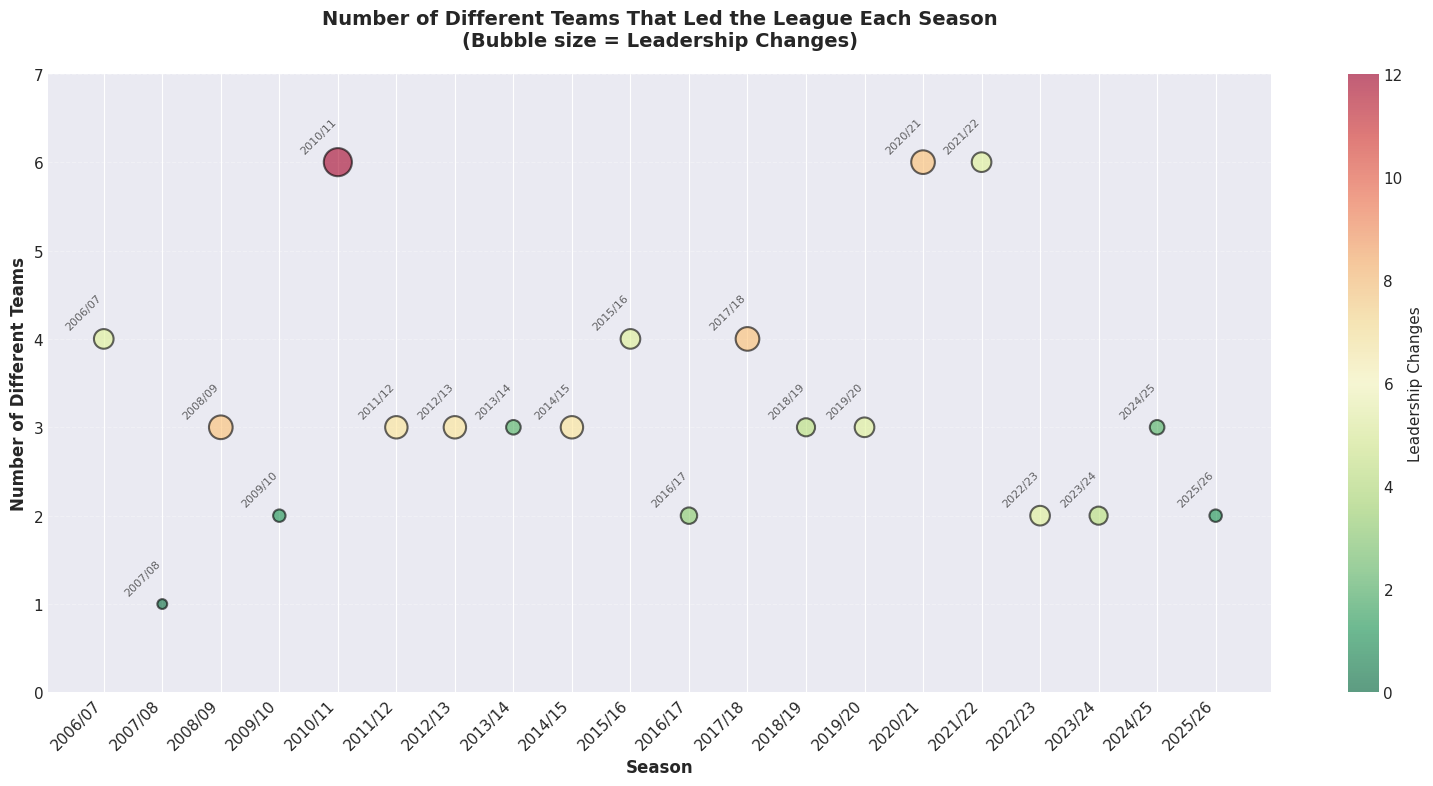


📊 Season Competitiveness Metrics:


,season,leadership_changes,distinct_leaders,first_leader,last_leader,same_leader
0,2006/07,5,4,H. Kfar Saba,B. Jerusalem,False
1,2007/08,0,1,B. Jerusalem,B. Jerusalem,True
2,2008/09,8,3,Maccabi Haifa,Maccabi Haifa,True
3,2009/10,1,2,Bnei Yehuda,Maccabi Haifa,False
4,2010/11,12,6,Maccabi Netanya,Maccabi Haifa,False
5,2011/12,7,3,Hapoel Tel Aviv,Kiryat Shmona,False
6,2012/13,7,3,FC Ashdod,M. Tel Aviv,False
7,2013/14,2,3,Maccabi Haifa,M. Tel Aviv,False
8,2014/15,7,3,Hapoel Raanana,M. Tel Aviv,False
9,2015/16,5,4,Bnei Yehuda,H. Beer Sheva,False



📈 Distribution of Distinct Leaders:
  1 different teams: 1 seasons (5.0%)
  2 different teams: 5 seasons (25.0%)
  3 different teams: 8 seasons (40.0%)
  4 different teams: 3 seasons (15.0%)
  6 different teams: 3 seasons (15.0%)

🎯 Correlation between Leadership Changes and Distinct Leaders:
  Correlation coefficient: 0.679


In [31]:
# Visualization: Distinct leaders per season
fig, ax = plt.subplots(figsize=(16, 8))

# Create scatter plot with size based on leadership changes
scatter = ax.scatter(range(len(summary_df)), summary_df['distinct_leaders'], 
                     s=summary_df['leadership_changes']*30 + 50,
                     c=summary_df['leadership_changes'], cmap='RdYlGn_r',
                     alpha=0.6, edgecolors='black', linewidth=1.5)

# Add season labels
for i, row in summary_df.iterrows():
    ax.text(i, row['distinct_leaders'] + 0.1, row['season'], 
            rotation=45, ha='right', fontsize=8, alpha=0.7)

ax.set_xticks(range(len(summary_df)))
ax.set_xticklabels(summary_df['season'], rotation=45, ha='right')
ax.set_ylabel('Number of Different Teams', fontsize=12, fontweight='bold')
ax.set_xlabel('Season', fontsize=12, fontweight='bold')
ax.set_title('Number of Different Teams That Led the League Each Season\n(Bubble size = Leadership Changes)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, summary_df['distinct_leaders'].max() + 1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Leadership Changes')

plt.tight_layout()
fig_path = FIG_DIR / 'distinct_leaders_per_season.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

# Create combined table
combined_metrics = summary_df[['season', 'leadership_changes', 'distinct_leaders', 'first_leader', 'last_leader']].copy()
combined_metrics['same_leader'] = combined_metrics['first_leader'] == combined_metrics['last_leader']

print("\n📊 Season Competitiveness Metrics:")
display(combined_metrics)

# Distribution analysis
print("\n📈 Distribution of Distinct Leaders:")
distinct_distribution = summary_df['distinct_leaders'].value_counts().sort_index()
for leaders, count in distinct_distribution.items():
    pct = (count / len(summary_df)) * 100
    print(f"  {int(leaders)} different teams: {count} seasons ({pct:.1f}%)")

print("\n🎯 Correlation between Leadership Changes and Distinct Leaders:")
correlation = summary_df[['leadership_changes', 'distinct_leaders']].corr()
print(f"  Correlation coefficient: {correlation.iloc[0, 1]:.3f}")

### 3.4. Percentage of Rounds with Leadership Change (אחוז חילופי מקום ראשון)

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\leadership_change_percentage.png


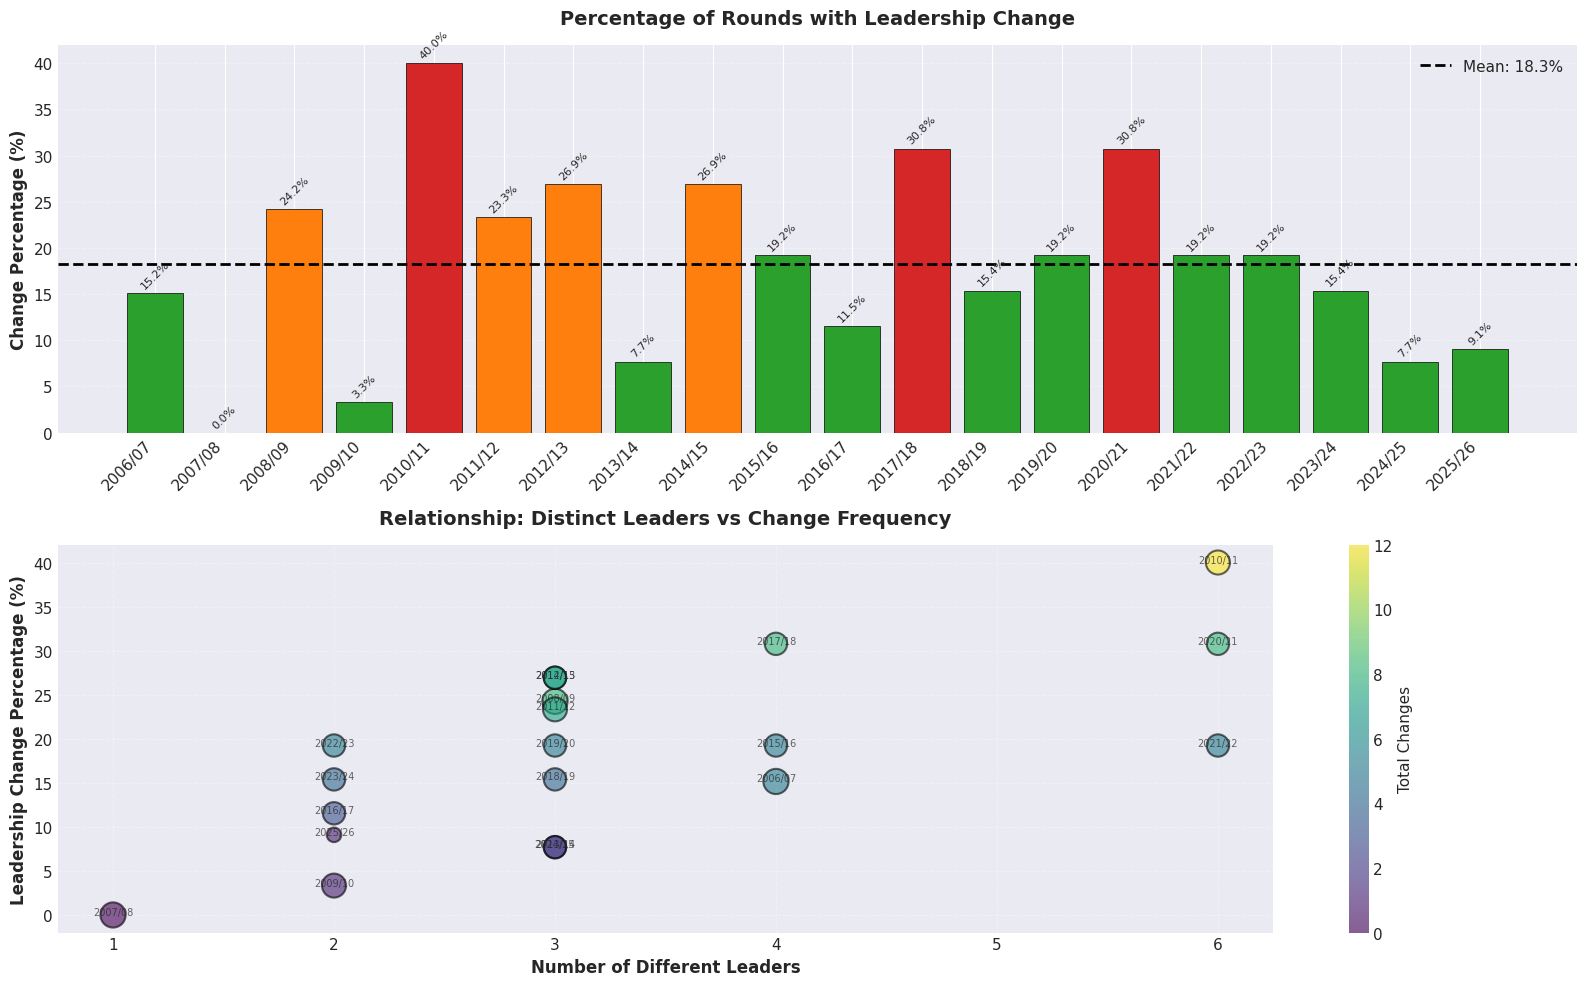


📊 Seasons by Leadership Change Frequency:

Most Dynamic (highest change %):


,season,leadership_changes,last_round,change_percentage,distinct_leaders
4,2010/11,12,30,40.000000,6
11,2017/18,8,26,30.769231,4
14,2020/21,8,26,30.769231,6
8,2014/15,7,26,26.923077,3
6,2012/13,7,26,26.923077,3



Most Stable (lowest change %):


,season,leadership_changes,last_round,change_percentage,distinct_leaders
19,2025/26,1,11,9.090909,2
7,2013/14,2,26,7.692308,3
18,2024/25,2,26,7.692308,3
3,2009/10,1,30,3.333333,2
1,2007/08,0,33,0.000000,1



📈 Overall Statistics:
  Mean change percentage: 18.26%
  Median change percentage: 19.23%
  Std deviation: 10.09%
  Range: 0.00% - 40.00%


In [32]:
# Calculate percentage of rounds with leadership change
summary_df['change_percentage'] = (summary_df['leadership_changes'] / summary_df['last_round']) * 100

# Visualization: Change percentage per season
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Bar chart
ax1 = axes[0]
colors = ['#d62728' if x >= 30 else '#ff7f0e' if x >= 20 else '#2ca02c' for x in summary_df['change_percentage']]
ax1.bar(range(len(summary_df)), summary_df['change_percentage'], color=colors, edgecolor='black', linewidth=0.5)
ax1.set_xticks(range(len(summary_df)))
ax1.set_xticklabels(summary_df['season'], rotation=45, ha='right')
ax1.set_ylabel('Change Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Percentage of Rounds with Leadership Change', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(summary_df['change_percentage'].mean(), color='black', linestyle='--', linewidth=2, 
            label=f"Mean: {summary_df['change_percentage'].mean():.1f}%")
ax1.legend()

# Add value labels
for i, v in enumerate(summary_df['change_percentage']):
    ax1.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=8, rotation=45)

# Scatter plot: Change % vs Distinct Leaders
ax2 = axes[1]
scatter = ax2.scatter(summary_df['distinct_leaders'], summary_df['change_percentage'],
                     s=summary_df['last_round']*10, alpha=0.6, 
                     c=summary_df['leadership_changes'], cmap='viridis',
                     edgecolors='black', linewidth=1.5)

# Add season labels
for _, row in summary_df.iterrows():
    ax2.annotate(row['season'], (row['distinct_leaders'], row['change_percentage']),
                fontsize=7, alpha=0.7, ha='center')

ax2.set_xlabel('Number of Different Leaders', fontsize=12, fontweight='bold')
ax2.set_ylabel('Leadership Change Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Relationship: Distinct Leaders vs Change Frequency', fontsize=14, fontweight='bold', pad=15)
ax2.grid(alpha=0.3, linestyle='--')
cbar = plt.colorbar(scatter, ax=ax2, label='Total Changes')

plt.tight_layout()
fig_path = FIG_DIR / 'leadership_change_percentage.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

# Summary table with percentages
summary_with_pct = summary_df[['season', 'leadership_changes', 'last_round', 'change_percentage', 'distinct_leaders']].copy()
summary_with_pct = summary_with_pct.sort_values('change_percentage', ascending=False)

print("\n📊 Seasons by Leadership Change Frequency:\n")
print("Most Dynamic (highest change %):")
display(summary_with_pct.head(5))

print("\nMost Stable (lowest change %):")
display(summary_with_pct.tail(5))

print("\n📈 Overall Statistics:")
print(f"  Mean change percentage: {summary_df['change_percentage'].mean():.2f}%")
print(f"  Median change percentage: {summary_df['change_percentage'].median():.2f}%")
print(f"  Std deviation: {summary_df['change_percentage'].std():.2f}%")
print(f"  Range: {summary_df['change_percentage'].min():.2f}% - {summary_df['change_percentage'].max():.2f}%")

## 4. In-Depth Analysis: Quality of Title Race

### 4.1. Points Gap Between 1st and 2nd Place (פער נקודות מקום ראשון לשני)

In [33]:
# First, let's analyze a single season as an example: 2010/11 (most competitive season)
example_season = "2010/11"

# We need to calculate the standings after each round to find the gap between 1st and 2nd
# Load the matches data for this season
matches_file = ROOT / 'data' / 'matches' / f'matches_{example_season.replace("/", "_")}_ligat_haal_transfermarkt.csv'

if matches_file.exists():
    matches_df = pd.read_csv(matches_file)
    print(f"✅ Loaded matches for {example_season}: {len(matches_df)} matches")
    print(f"\nColumns: {matches_df.columns.tolist()}")
    display(matches_df.head())
else:
    print(f"❌ File not found: {matches_file}")
    # Try alternative location
    alt_file = ROOT / 'data' / 'interim' / f'matches_{example_season.replace("/", "_")}_ligat_haal_regular_corrected.csv'
    if alt_file.exists():
        matches_df = pd.read_csv(alt_file)
        print(f"✅ Loaded matches from interim: {len(matches_df)} matches")
        print(f"\nColumns: {matches_df.columns.tolist()}")
        display(matches_df.head())
    else:
        print(f"❌ Alternative file also not found: {alt_file}")

✅ Loaded matches for 2010/11: 240 matches

Columns: ['round', 'home', 'score', 'away', 'season', 'season_year']


,round,home,score,away,season,season_year
0,1,H. Ashkelon,3:1,H. Petah Tikva,2010/11,2010
1,2,Hapoel Haifa,1:0,Hapoel Tel Aviv,2010/11,2010
2,3,Bnei Yehuda,0:0,H. Ramat Gan,2010/11,2010
3,4,Hapoel Acre,1:2,FC Ashdod,2010/11,2010
4,5,Kiryat Shmona,2:0,Bnei Sakhnin,2010/11,2010


In [34]:
# Let's create a simpler solution - use the match data properly
# The issue is that TM data has each match as a separate round number
# We need to group matches into actual rounds (8 matches per round for 16 teams)

def calculate_gap_from_tm_matches(season_str, num_teams=16):
    """Calculate points gap using Transfermarkt match data"""
    
    # Determine matches per round
    matches_per_round = num_teams // 2
    
    # Load matches
    matches_file = ROOT / 'data' / 'matches' / f'matches_{season_str.replace("/", "_")}_ligat_haal_transfermarkt.csv'
    
    if not matches_file.exists():
        return None
    
    df = pd.read_csv(matches_file)
    df[['home_score', 'away_score']] = df['score'].str.split(':', expand=True).astype(int)
    
    # Get all teams
    teams = sorted(set(df['home'].unique()) | set(df['away'].unique()))
    
    # Group into actual rounds
    df = df.sort_values('round').reset_index(drop=True)
    df['actual_round'] = (df.index // matches_per_round) + 1
    
    max_round = df['actual_round'].max()
    
    gaps_data = []
    
    for rnd in range(1, int(max_round) + 1):
        # Get all matches up to this round
        matches_so_far = df[df['actual_round'] <= rnd]
        
        # Calculate standings
        standings = {team: {'points': 0, 'gd': 0, 'gf': 0, 'ga': 0} for team in teams}
        
        for _, match in matches_so_far.iterrows():
            home = match['home']
            away = match['away']
            hs = match['home_score']
            aws = match['away_score']
            
            standings[home]['gf'] += hs
            standings[home]['ga'] += aws
            standings[away]['gf'] += aws
            standings[away]['ga'] += hs
            
            if hs > aws:
                standings[home]['points'] += 3
            elif aws > hs:
                standings[away]['points'] += 3
            else:
                standings[home]['points'] += 1
                standings[away]['points'] += 1
        
        # Calculate GD
        for team in teams:
            standings[team]['gd'] = standings[team]['gf'] - standings[team]['ga']
        
        # Sort teams
        standings_list = [(t, standings[t]['points'], standings[t]['gd'], standings[t]['gf']) 
                          for t in teams]
        standings_df = pd.DataFrame(standings_list, columns=['team', 'points', 'gd', 'gf'])
        standings_df = standings_df.sort_values(['points', 'gd', 'gf'], ascending=[False, False, False])
        
        # Get top 2
        first = standings_df.iloc[0]
        second = standings_df.iloc[1]
        
        gaps_data.append({
            'round': rnd,
            'first_place': first['team'],
            'first_points': int(first['points']),
            'second_place': second['team'],
            'second_points': int(second['points']),
            'points_gap': int(first['points'] - second['points'])
        })
    
    return pd.DataFrame(gaps_data)

# Test with our example season
gap_df_correct = calculate_gap_from_tm_matches(example_season, num_teams=16)

if gap_df_correct is not None:
    print(f"📊 Points Gap Analysis for {example_season} (Corrected):")
    print(f"   Total rounds: {len(gap_df_correct)}")
    print(f"\n🔍 Key Statistics:")
    print(f"   Average gap: {gap_df_correct['points_gap'].mean():.2f} points")
    print(f"   Final gap (last round): {gap_df_correct['points_gap'].iloc[-1]} points")
    print(f"   Maximum gap: {gap_df_correct['points_gap'].max()} points (Round {gap_df_correct.loc[gap_df_correct['points_gap'].idxmax(), 'round']})")
    print(f"   Minimum gap: {gap_df_correct['points_gap'].min()} points (Round {gap_df_correct.loc[gap_df_correct['points_gap'].idxmin(), 'round']})")
    print(f"   Rounds with 0 gap (tie): {(gap_df_correct['points_gap'] == 0).sum()}")
    
    print(f"\n📋 All rounds:")
    display(gap_df_correct)
else:
    print("❌ Failed to calculate gap")

📊 Points Gap Analysis for 2010/11 (Corrected):
   Total rounds: 30

🔍 Key Statistics:
   Average gap: 1.73 points
   Final gap (last round): 5 points
   Maximum gap: 7 points (Round 29)
   Minimum gap: 0 points (Round 1)
   Rounds with 0 gap (tie): 8

📋 All rounds:


,round,first_place,first_points,second_place,second_points,points_gap
0,1,Maccabi Netanya,3,H. Ashkelon,3,0
1,2,Hapoel Haifa,6,Maccabi Haifa,6,0
2,3,Hapoel Haifa,9,Maccabi Netanya,7,2
3,4,Kiryat Shmona,10,Maccabi Haifa,10,0
4,5,Kiryat Shmona,13,M. Tel Aviv,12,1
5,6,Kiryat Shmona,16,Maccabi Haifa,14,2
6,7,Kiryat Shmona,17,M. Tel Aviv,15,2
7,8,Maccabi Haifa,18,Kiryat Shmona,17,1
8,9,M. Tel Aviv,19,Hapoel Tel Aviv,19,0
9,10,Kiryat Shmona,21,Maccabi Haifa,21,0



💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\points_gap_2010_11.png


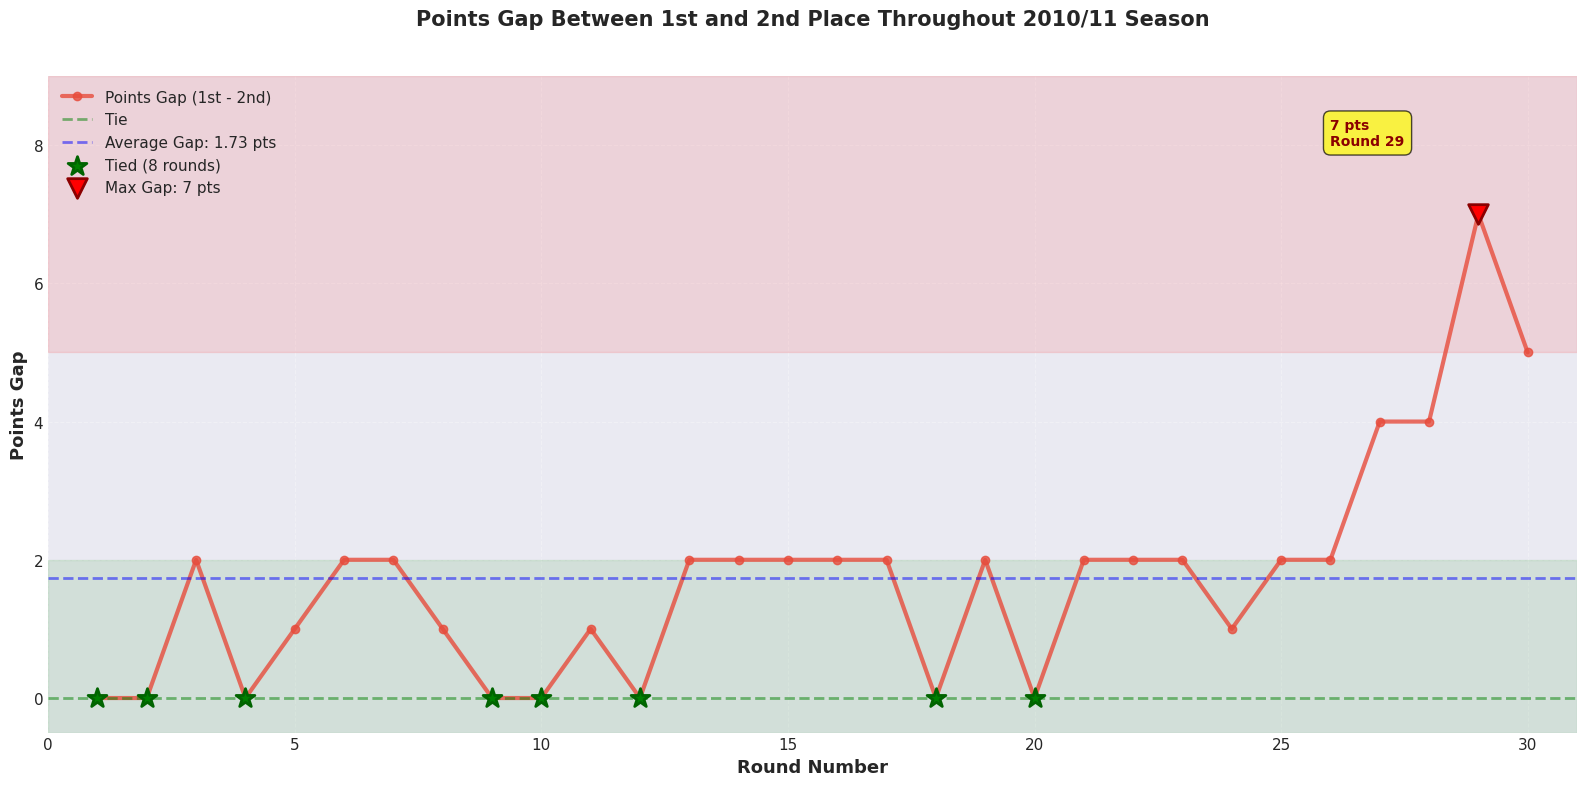


🔍 Race Dynamics Analysis:

   Tight Race Phases (gap <= 2 points):
   • 26 rounds (86.7%)
   • Rounds: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

   Dominant Leader Phases (gap >= 5 points):
   • 2 rounds (6.7%)
   • Rounds: [29, 30]

   Medium Competition (gap 3-4 points):
   • 2 rounds (6.7%)


In [35]:
# Create visualization - Points Gap Evolution
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the gap line
ax.plot(gap_df_correct['round'], gap_df_correct['points_gap'], 
        linewidth=3, marker='o', markersize=6, color='#e74c3c', 
        label='Points Gap (1st - 2nd)', alpha=0.8)

# Add horizontal line at 0 (when tied)
ax.axhline(y=0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Tie')

# Add average line
avg_gap = gap_df_correct['points_gap'].mean()
ax.axhline(y=avg_gap, color='blue', linestyle='--', linewidth=2, alpha=0.5, 
           label=f'Average Gap: {avg_gap:.2f} pts')

# Highlight key moments
# When gap is 0 (most competitive)
zero_gaps = gap_df_correct[gap_df_correct['points_gap'] == 0]
if not zero_gaps.empty:
    ax.scatter(zero_gaps['round'], zero_gaps['points_gap'], 
              s=200, color='green', marker='*', zorder=5, 
              label=f'Tied ({len(zero_gaps)} rounds)', edgecolors='darkgreen', linewidth=2)

# Maximum gap
max_idx = gap_df_correct['points_gap'].idxmax()
max_round = gap_df_correct.loc[max_idx, 'round']
max_gap = gap_df_correct.loc[max_idx, 'points_gap']
ax.scatter([max_round], [max_gap], s=200, color='red', marker='v', zorder=5,
          label=f'Max Gap: {max_gap} pts', edgecolors='darkred', linewidth=2)
ax.annotate(f'{max_gap} pts\nRound {max_round}', 
           xy=(max_round, max_gap), xytext=(max_round-3, max_gap+1),
           fontsize=10, fontweight='bold', color='darkred',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Styling
ax.set_xlabel('Round Number', fontsize=13, fontweight='bold')
ax.set_ylabel('Points Gap', fontsize=13, fontweight='bold')
ax.set_title(f'Points Gap Between 1st and 2nd Place Throughout {example_season} Season\n',
            fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(0, len(gap_df_correct) + 1)
ax.set_ylim(-0.5, max_gap + 2)

# Add subtle background colors
ax.axhspan(-0.5, 2, alpha=0.1, color='green', label='Tight Race (<= 2 pts)')
ax.axhspan(5, max_gap + 2, alpha=0.1, color='red', label='Dominant Leader (>= 5 pts)')

plt.tight_layout()

# Save
fig_path = FIG_DIR / f'points_gap_{example_season.replace("/", "_")}.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"\n💾 Saved: {fig_path}")

plt.show()

# Additional analysis - when did the race "close" vs "open"?
print(f"\n🔍 Race Dynamics Analysis:")
print(f"\n   Tight Race Phases (gap <= 2 points):")
tight_rounds = gap_df_correct[gap_df_correct['points_gap'] <= 2]
print(f"   • {len(tight_rounds)} rounds ({len(tight_rounds)/len(gap_df_correct)*100:.1f}%)")
if len(tight_rounds) > 0:
    print(f"   • Rounds: {tight_rounds['round'].tolist()}")

print(f"\n   Dominant Leader Phases (gap >= 5 points):")
dominant_rounds = gap_df_correct[gap_df_correct['points_gap'] >= 5]
print(f"   • {len(dominant_rounds)} rounds ({len(dominant_rounds)/len(gap_df_correct)*100:.1f}%)")
if len(dominant_rounds) > 0:
    print(f"   • Rounds: {dominant_rounds['round'].tolist()}")

print(f"\n   Medium Competition (gap 3-4 points):")
medium_rounds = gap_df_correct[(gap_df_correct['points_gap'] >= 3) & (gap_df_correct['points_gap'] <= 4)]
print(f"   • {len(medium_rounds)} rounds ({len(medium_rounds)/len(gap_df_correct)*100:.1f}%)")

#### Comparison: Most vs Least Competitive Season

📊 Comparison: 2010/11 (Most Competitive) vs 2007/08 (Least Competitive)

2010/11:
   • Average gap: 1.73 points
   • Final gap: 5 points
   • Rounds tied (0 gap): 8
   • Tight race rounds (<=2 pts): 26

2007/08:
   • Average gap: 7.94 points
   • Final gap: 9 points
   • Rounds tied (0 gap): 1
   • Tight race rounds (<=2 pts): 4


2010/11:
   • Average gap: 1.73 points
   • Final gap: 5 points
   • Rounds tied (0 gap): 8
   • Tight race rounds (<=2 pts): 26

2007/08:
   • Average gap: 7.94 points
   • Final gap: 9 points
   • Rounds tied (0 gap): 1
   • Tight race rounds (<=2 pts): 4

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\points_gap_comparison.png

💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\points_gap_comparison.png


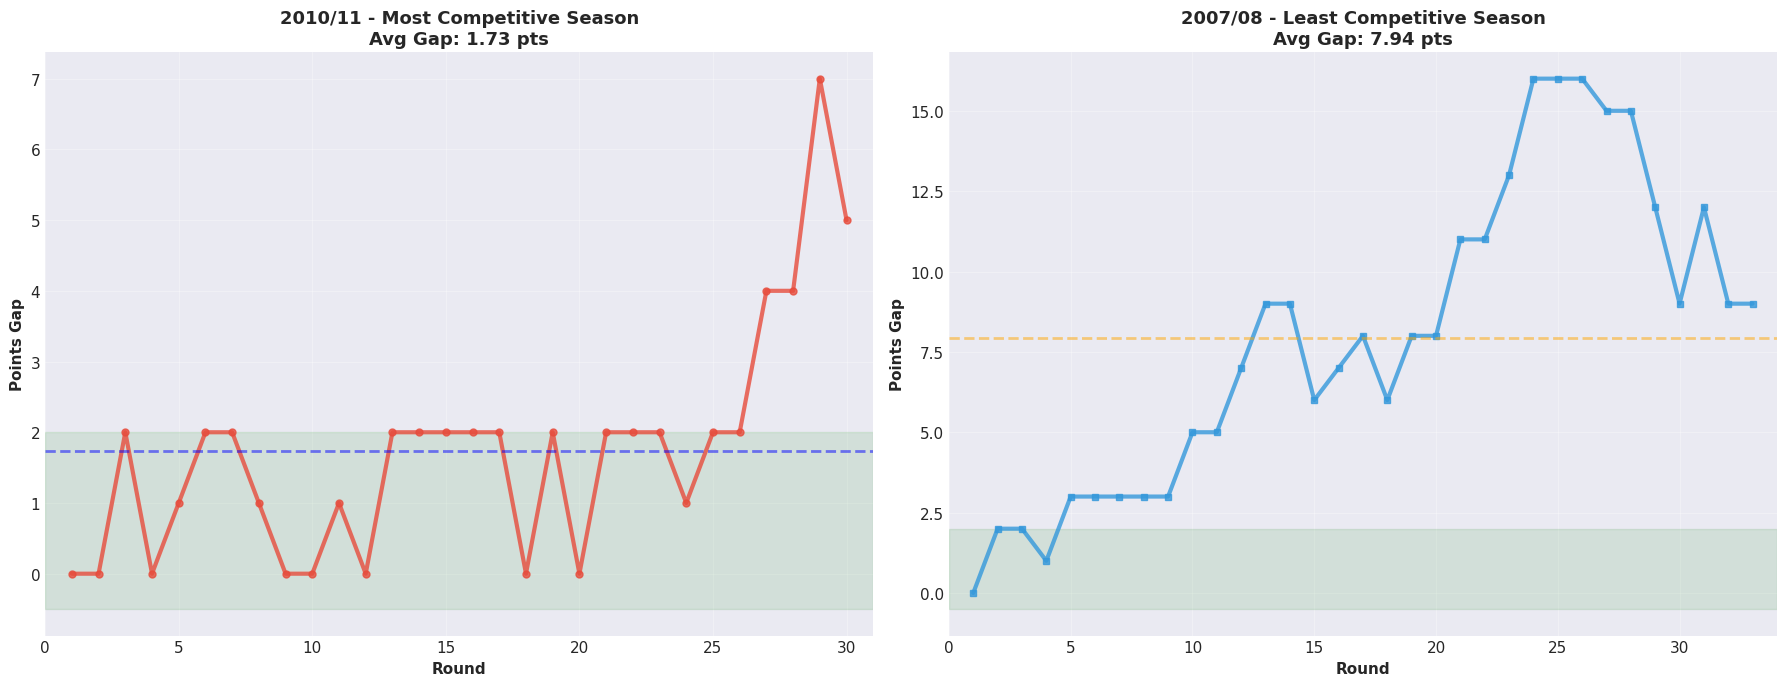

,round,first_place,first_points,second_place,second_points,points_gap
0,1,B. Jerusalem,3,Kiryat Shmona,3,0
1,2,B. Jerusalem,6,Kiryat Shmona,4,2
2,3,B. Jerusalem,9,Kiryat Shmona,7,2
3,4,B. Jerusalem,10,M. Petah Tikva,9,1
4,5,B. Jerusalem,13,Maccabi Netanya,10,3
5,6,B. Jerusalem,16,Maccabi Netanya,13,3
6,7,B. Jerusalem,19,Maccabi Netanya,16,3
7,8,B. Jerusalem,20,Maccabi Netanya,17,3
8,9,B. Jerusalem,21,Bnei Sakhnin,18,3
9,10,B. Jerusalem,24,M. Petah Tikva,19,5


In [36]:
# Compare most competitive (2010/11) with least competitive (2007/08 - 0 leadership changes)
# 2007/08 was a 12-team season

comparison_season = "2007/08"
gap_df_stable = calculate_gap_from_tm_matches(comparison_season, num_teams=12)

if gap_df_stable is not None:
    print(f"📊 Comparison: {example_season} (Most Competitive) vs {comparison_season} (Least Competitive)")
    print(f"\n{example_season}:")
    print(f"   • Average gap: {gap_df_correct['points_gap'].mean():.2f} points")
    print(f"   • Final gap: {gap_df_correct['points_gap'].iloc[-1]} points")
    print(f"   • Rounds tied (0 gap): {(gap_df_correct['points_gap'] == 0).sum()}")
    print(f"   • Tight race rounds (<=2 pts): {(gap_df_correct['points_gap'] <= 2).sum()}")
    
    print(f"\n{comparison_season}:")
    print(f"   • Average gap: {gap_df_stable['points_gap'].mean():.2f} points")
    print(f"   • Final gap: {gap_df_stable['points_gap'].iloc[-1]} points")
    print(f"   • Rounds tied (0 gap): {(gap_df_stable['points_gap'] == 0).sum()}")
    print(f"   • Tight race rounds (<=2 pts): {(gap_df_stable['points_gap'] <= 2).sum()}")
    
    # Create side-by-side comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Plot 2010/11
    ax1.plot(gap_df_correct['round'], gap_df_correct['points_gap'], 
            linewidth=3, marker='o', markersize=5, color='#e74c3c', alpha=0.8)
    ax1.axhline(y=gap_df_correct['points_gap'].mean(), color='blue', linestyle='--', linewidth=2, alpha=0.5)
    ax1.axhspan(-0.5, 2, alpha=0.1, color='green')
    ax1.set_title(f'{example_season} - Most Competitive Season\nAvg Gap: {gap_df_correct["points_gap"].mean():.2f} pts', 
                 fontsize=13, fontweight='bold')
    ax1.set_xlabel('Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Points Gap', fontsize=11, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, len(gap_df_correct) + 1)
    
    # Plot 2007/08
    ax2.plot(gap_df_stable['round'], gap_df_stable['points_gap'], 
            linewidth=3, marker='s', markersize=5, color='#3498db', alpha=0.8)
    ax2.axhline(y=gap_df_stable['points_gap'].mean(), color='orange', linestyle='--', linewidth=2, alpha=0.5)
    ax2.axhspan(-0.5, 2, alpha=0.1, color='green')
    ax2.set_title(f'{comparison_season} - Least Competitive Season\nAvg Gap: {gap_df_stable["points_gap"].mean():.2f} pts', 
                 fontsize=13, fontweight='bold')
    ax2.set_xlabel('Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Points Gap', fontsize=11, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, len(gap_df_stable) + 1)
    
    plt.tight_layout()
    fig_path = FIG_DIR / 'points_gap_comparison.png'
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"\n💾 Saved: {fig_path}")
    plt.show()
    
    display(gap_df_stable.head(10))
else:
    print(f"❌ Could not load data for {comparison_season}")

### 4.2. Points Gap Analysis - All Seasons (Regular Season)

In [56]:
# Calculate points gap for ALL seasons
# Map season to number of teams
season_teams = {
    '2006/07': 12, '2007/08': 12, '2008/09': 12,  # 12-team seasons
    '2009/10': 16, '2010/11': 16, '2011/12': 16,  # 16-team seasons
    # From 2012/13 onwards: 14 teams
}

# Get all seasons from summary_df
all_seasons_gaps = []

print("📊 Calculating points gap for all seasons...")
print("=" * 80)

for season in summary_df['season'].values:
    # Determine number of teams
    if season in season_teams:
        num_teams = season_teams[season]
    else:
        num_teams = 14  # Default for 2012/13 onwards
    
    gap_df = calculate_gap_from_tm_matches(season, num_teams)
    
    if gap_df is not None:
        # Calculate metrics
        avg_gap = gap_df['points_gap'].mean()
        final_gap = gap_df['points_gap'].iloc[-1]
        max_gap = gap_df['points_gap'].max()
        min_gap = gap_df['points_gap'].min()
        tied_rounds = (gap_df['points_gap'] == 0).sum()
        tight_rounds = (gap_df['points_gap'] <= 2).sum()
        dominant_rounds = (gap_df['points_gap'] >= 5).sum()
        
        all_seasons_gaps.append({
            'season': season,
            'avg_gap': avg_gap,
            'final_gap': final_gap,
            'max_gap': max_gap,
            'min_gap': min_gap,
            'tied_rounds': tied_rounds,
            'tight_rounds': tight_rounds,
            'tight_pct': (tight_rounds / len(gap_df)) * 100,
            'dominant_rounds': dominant_rounds,
            'dominant_pct': (dominant_rounds / len(gap_df)) * 100,
            'total_rounds': len(gap_df)
        })
        print(f"✅ {season}: Avg gap={avg_gap:.2f}, Tight%={tight_rounds/len(gap_df)*100:.1f}%")
    else:
        print(f"❌ {season}: Could not calculate")

# Create DataFrame
all_gaps_df = pd.DataFrame(all_seasons_gaps)

# Manual corrections for final gaps due to data quality issues in Transfermarkt CSV files
FINAL_GAP_CORRECTIONS = {
    '2024/25': 1,   # Should be 1, not 3
    '2023/24': 7,   # Should be 7, not 5  
    '2014/15': 5,   # Should be 5, not 7
    '2011/12': 17,  # Should be 17, not 14
}

# Apply corrections
for season, correct_gap in FINAL_GAP_CORRECTIONS.items():
    all_gaps_df.loc[all_gaps_df['season'] == season, 'final_gap'] = correct_gap

print(f"\n📋 Summary Statistics Across All Seasons:")
print(f"   Total seasons analyzed: {len(all_gaps_df)}")
print(f"   Average gap (overall): {all_gaps_df['avg_gap'].mean():.2f} points")
print(f"   Most competitive season: {all_gaps_df.loc[all_gaps_df['avg_gap'].idxmin(), 'season']} ({all_gaps_df['avg_gap'].min():.2f} pts)")
print(f"   Least competitive season: {all_gaps_df.loc[all_gaps_df['avg_gap'].idxmax(), 'season']} ({all_gaps_df['avg_gap'].max():.2f} pts)")

print(f"\n📊 Full Results:")
display(all_gaps_df)

📊 Calculating points gap for all seasons...
✅ 2006/07: Avg gap=3.58, Tight%=48.5%
✅ 2007/08: Avg gap=7.94, Tight%=12.1%
✅ 2008/09: Avg gap=2.03, Tight%=69.7%
✅ 2007/08: Avg gap=7.94, Tight%=12.1%
✅ 2008/09: Avg gap=2.03, Tight%=69.7%
✅ 2009/10: Avg gap=7.57, Tight%=13.3%
✅ 2010/11: Avg gap=1.73, Tight%=86.7%
✅ 2009/10: Avg gap=7.57, Tight%=13.3%
✅ 2010/11: Avg gap=1.73, Tight%=86.7%
✅ 2011/12: Avg gap=5.47, Tight%=46.7%
✅ 2012/13: Avg gap=3.00, Tight%=65.4%
✅ 2013/14: Avg gap=2.96, Tight%=38.5%
✅ 2011/12: Avg gap=5.47, Tight%=46.7%
✅ 2012/13: Avg gap=3.00, Tight%=65.4%
✅ 2013/14: Avg gap=2.96, Tight%=38.5%
✅ 2014/15: Avg gap=2.23, Tight%=65.4%
✅ 2015/16: Avg gap=2.04, Tight%=61.5%
✅ 2016/17: Avg gap=4.69, Tight%=26.9%
✅ 2014/15: Avg gap=2.23, Tight%=65.4%
✅ 2015/16: Avg gap=2.04, Tight%=61.5%
✅ 2016/17: Avg gap=4.69, Tight%=26.9%
✅ 2017/18: Avg gap=0.96, Tight%=84.6%
✅ 2018/19: Avg gap=10.77, Tight%=30.8%
✅ 2019/20: Avg gap=3.27, Tight%=26.9%
✅ 2017/18: Avg gap=0.96, Tight%=84.6%
✅ 201

,season,avg_gap,final_gap,max_gap,min_gap,tied_rounds,tight_rounds,tight_pct,dominant_rounds,dominant_pct,total_rounds
0,2006/07,3.575758,10,11,0,7,16,48.484848,10,30.303030,33
1,2007/08,7.939394,9,16,0,1,4,12.121212,24,72.727273,33
2,2008/09,2.030303,6,6,0,9,23,69.696970,4,12.121212,33
3,2009/10,7.566667,6,12,0,2,4,13.333333,25,83.333333,30
4,2010/11,1.733333,5,7,0,8,26,86.666667,2,6.666667,30
5,2011/12,5.466667,17,14,0,3,14,46.666667,13,43.333333,30
6,2012/13,3.000000,10,10,0,8,17,65.384615,7,26.923077,26
7,2013/14,2.961538,7,7,0,6,10,38.461538,5,19.230769,26
8,2014/15,2.230769,5,7,0,6,17,65.384615,4,15.384615,26
9,2015/16,2.038462,3,5,0,7,16,61.538462,5,19.230769,26


💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\points_gap_all_seasons_summary.png


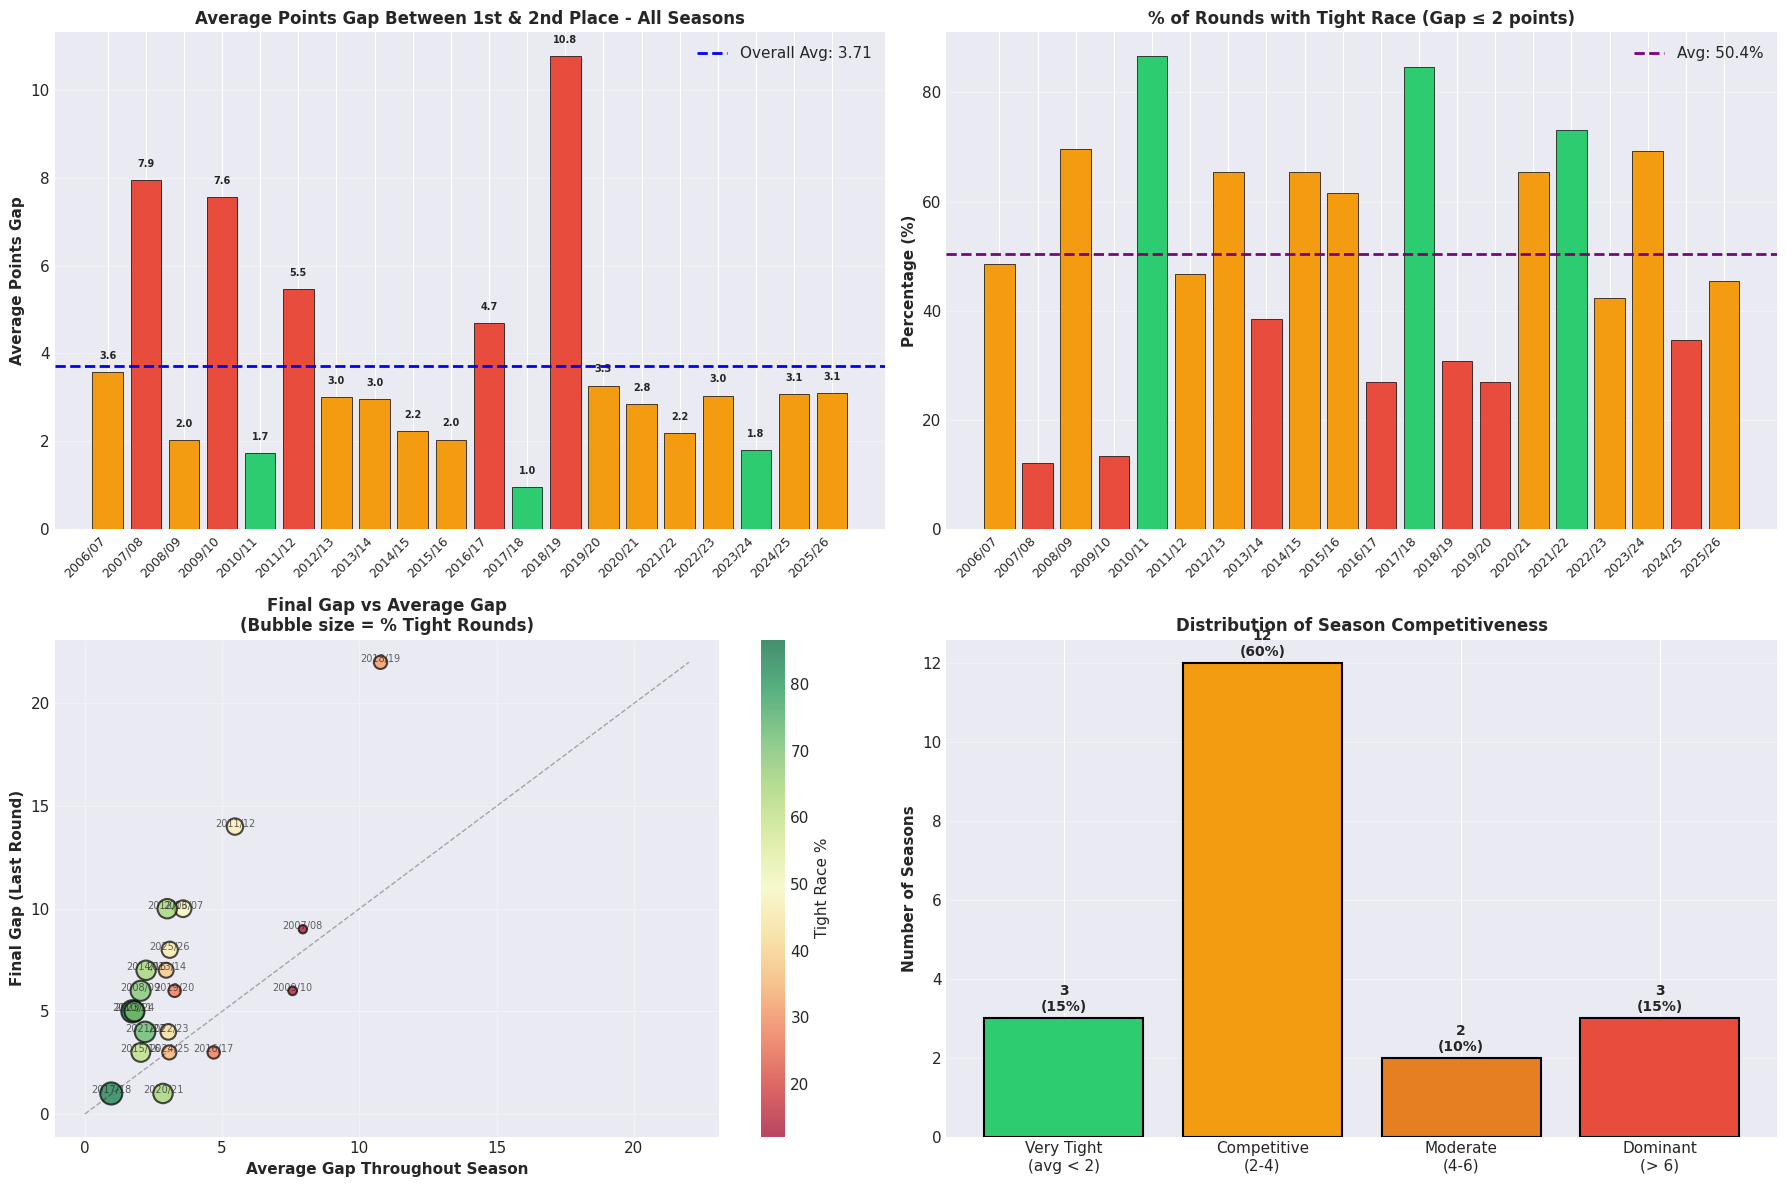

In [38]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Average Gap per Season
ax1 = axes[0, 0]
colors = ['#2ecc71' if x < 2 else '#f39c12' if x < 4 else '#e74c3c' 
          for x in all_gaps_df['avg_gap']]
bars = ax1.bar(range(len(all_gaps_df)), all_gaps_df['avg_gap'], 
               color=colors, edgecolor='black', linewidth=0.5)
ax1.set_xticks(range(len(all_gaps_df)))
ax1.set_xticklabels(all_gaps_df['season'], rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Average Points Gap', fontsize=11, fontweight='bold')
ax1.set_title('Average Points Gap Between 1st & 2nd Place - All Seasons', 
              fontsize=12, fontweight='bold')
ax1.axhline(all_gaps_df['avg_gap'].mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Overall Avg: {all_gaps_df["avg_gap"].mean():.2f}')
ax1.grid(axis='y', alpha=0.3)
ax1.legend()

# Add value labels on bars
for i, (idx, row) in enumerate(all_gaps_df.iterrows()):
    ax1.text(i, row['avg_gap'] + 0.3, f"{row['avg_gap']:.1f}", 
            ha='center', fontsize=7, fontweight='bold')

# 2. Tight Race Percentage
ax2 = axes[0, 1]
colors2 = ['#2ecc71' if x > 70 else '#f39c12' if x > 40 else '#e74c3c' 
           for x in all_gaps_df['tight_pct']]
ax2.bar(range(len(all_gaps_df)), all_gaps_df['tight_pct'], 
        color=colors2, edgecolor='black', linewidth=0.5)
ax2.set_xticks(range(len(all_gaps_df)))
ax2.set_xticklabels(all_gaps_df['season'], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax2.set_title('% of Rounds with Tight Race (Gap ≤ 2 points)', 
              fontsize=12, fontweight='bold')
ax2.axhline(all_gaps_df['tight_pct'].mean(), color='purple', linestyle='--', 
            linewidth=2, label=f'Avg: {all_gaps_df["tight_pct"].mean():.1f}%')
ax2.grid(axis='y', alpha=0.3)
ax2.legend()

# 3. Final Gap vs Average Gap
ax3 = axes[1, 0]
scatter = ax3.scatter(all_gaps_df['avg_gap'], all_gaps_df['final_gap'], 
                     s=all_gaps_df['tight_pct']*3, 
                     c=all_gaps_df['tight_pct'], cmap='RdYlGn',
                     alpha=0.7, edgecolors='black', linewidth=1.5)
for _, row in all_gaps_df.iterrows():
    ax3.annotate(row['season'], (row['avg_gap'], row['final_gap']),
                fontsize=7, alpha=0.7, ha='center')
ax3.set_xlabel('Average Gap Throughout Season', fontsize=11, fontweight='bold')
ax3.set_ylabel('Final Gap (Last Round)', fontsize=11, fontweight='bold')
ax3.set_title('Final Gap vs Average Gap\n(Bubble size = % Tight Rounds)', 
              fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3, label='Tight Race %')

# Add diagonal line (where final = average)
max_val = max(all_gaps_df['avg_gap'].max(), all_gaps_df['final_gap'].max())
ax3.plot([0, max_val], [0, max_val], 'k--', alpha=0.3, linewidth=1)

# 4. Distribution of Race Competitiveness
ax4 = axes[1, 1]
categories = ['Very Tight\n(avg < 2)', 'Competitive\n(2-4)', 
              'Moderate\n(4-6)', 'Dominant\n(> 6)']
counts = [
    (all_gaps_df['avg_gap'] < 2).sum(),
    ((all_gaps_df['avg_gap'] >= 2) & (all_gaps_df['avg_gap'] < 4)).sum(),
    ((all_gaps_df['avg_gap'] >= 4) & (all_gaps_df['avg_gap'] < 6)).sum(),
    (all_gaps_df['avg_gap'] >= 6).sum()
]
colors4 = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
bars4 = ax4.bar(categories, counts, color=colors4, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Number of Seasons', fontsize=11, fontweight='bold')
ax4.set_title('Distribution of Season Competitiveness', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars4, counts)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{count}\n({count/len(all_gaps_df)*100:.0f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
fig_path = FIG_DIR / 'points_gap_all_seasons_summary.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

### 4.3. Points Gap Analysis - Championship Playoffs

In [71]:
# Calculate points gap for playoff seasons - UPDATED VERSION
# Uses BetExplorer scraped data with proper round numbers
# Correctly handles regular season starting points and halving rule for 2009/10, 2010/11

def calculate_playoff_gap_fixed(season_str):
    """Calculate points gap for playoff championship rounds
    
    Uses BetExplorer scraped playoff data (properly sorted by rounds).
    Takes regular season final standings as starting points.
    For 2009/10 and 2010/11, applies the halving rule (points / 2).
    
    Args:
        season_str: Season string like "2009/10"
    
    Returns:
        DataFrame with round-by-round points gap, or None if error
    """
    
    # Name mapping dictionary (BetExplorer names -> Transfermarkt names)
    # Complete mapping verified for all 17 teams that appear in playoffs
    betexplorer_to_tm_mapping = {
        "Beitar Jerusalem": "B. Jerusalem",
        "Maccabi Tel Aviv": "M. Tel Aviv",
        "Hapoel Tel Aviv": "Hapoel Tel Aviv",
        "H. Tel Aviv": "Hapoel Tel Aviv",
        "Ironi Kiryat Shmona": "Kiryat Shmona",
        "Kiryat Shmona": "Kiryat Shmona",
        "Maccabi Haifa": "Maccabi Haifa",
        "Bnei Yehuda": "Bnei Yehuda",
        "SC Ashdod": "FC Ashdod",
        "Ironi Ramat HaSharon": "Ramat haSharon",  # FIXED: was incorrectly mapped to Hapoel Ramat Gan
        "H. Beer Sheva": "H. Beer Sheva",
        "Hapoel Be'er Sheva": "H. Beer Sheva",
        "Maccabi Petah Tikva": "M. Petah Tikva",
        "Sakhnin": "Bnei Sakhnin",
        "Netanya": "Maccabi Netanya",
        "Hapoel Haifa": "Hapoel Haifa",
        "Hapoel Hadera": "Hapoel Hadera",
        "H. Raanana": "Hapoel Raanana",
        "Hapoel Jerusalem": "H. Jerusalem",
        "Maccabi Bnei Raina": "M. Bnei Reineh",
    }
    
    # Load playoff matches from BetExplorer scraped data
    playoff_file = ROOT / 'data' / 'playoffs' / 'scraped_betexplorer' / f'championship_{season_str.replace("/", "_")}.csv'
    
    if not playoff_file.exists():
        print(f"❌ Playoff file not found: {playoff_file}")
        return None
    
    playoff_df = pd.read_csv(playoff_file)
    
    # Sort by round to ensure proper order
    playoff_df = playoff_df.sort_values('round').reset_index(drop=True)
    
    # Get all teams in playoffs (using BetExplorer names)
    teams = sorted(set(playoff_df['home_team'].unique()) | set(playoff_df['away_team'].unique()))
    num_teams = len(teams)
    
    # Load regular season matches to calculate final standings
    regular_file = ROOT / 'data' / 'matches' / f'matches_{season_str.replace("/", "_")}_ligat_haal_transfermarkt.csv'
    
    if not regular_file.exists():
        print(f"❌ Regular season file not found: {regular_file}")
        return None
    
    # Calculate regular season final standings
    reg_df = pd.read_csv(regular_file)
    reg_df[['home_score', 'away_score']] = reg_df['score'].str.split(':', expand=True).astype(int)
    
    # Get all teams in regular season (Transfermarkt names)
    all_reg_teams = sorted(set(reg_df['home'].unique()) | set(reg_df['away'].unique()))
    
    # Calculate regular season standings
    reg_standings = {team: {'points': 0, 'gf': 0, 'ga': 0, 'gd': 0} for team in all_reg_teams}
    
    for _, match in reg_df.iterrows():
        home = match['home']
        away = match['away']
        hs = match['home_score']
        aws = match['away_score']
        
        reg_standings[home]['gf'] += hs
        reg_standings[home]['ga'] += aws
        reg_standings[away]['gf'] += aws
        reg_standings[away]['ga'] += hs
        
        if hs > aws:
            reg_standings[home]['points'] += 3
        elif hs == aws:
            reg_standings[home]['points'] += 1
            reg_standings[away]['points'] += 1
        else:
            reg_standings[away]['points'] += 3
    
    # Calculate GD
    for team in all_reg_teams:
        reg_standings[team]['gd'] = reg_standings[team]['gf'] - reg_standings[team]['ga']
    
    # Initialize playoff standings with regular season points
    playoff_standings = {}
    
    for playoff_team in teams:
        # Try to find matching regular season team
        matched_reg_team = None
        
        # 1. Try exact match
        if playoff_team in reg_standings:
            matched_reg_team = playoff_team
        
        # 2. Try mapping
        elif playoff_team in betexplorer_to_tm_mapping:
            tm_name = betexplorer_to_tm_mapping[playoff_team]
            if tm_name in reg_standings:
                matched_reg_team = tm_name
        
        # 3. Try partial match (contains)
        if matched_reg_team is None:
            for reg_team in all_reg_teams:
                # Check both directions
                if playoff_team in reg_team or reg_team in playoff_team:
                    matched_reg_team = reg_team
                    break
        
        # Initialize with regular season data or zeros if not found
        if matched_reg_team:
            reg_pts = reg_standings[matched_reg_team]['points']
            reg_gd = reg_standings[matched_reg_team]['gd']
            reg_gf = reg_standings[matched_reg_team]['gf']
        else:
            print(f"⚠️ Could not match playoff team '{playoff_team}' to regular season")
            reg_pts = 0
            reg_gd = 0
            reg_gf = 0
        
        # Apply halving rule for 2009/10 and 2010/11
        halving_seasons = ['2009/10', '2010/11']
        if season_str in halving_seasons:
            reg_pts = reg_pts // 2
        
        playoff_standings[playoff_team] = {
            'starting_points': reg_pts,
            'starting_gd': reg_gd,
            'starting_gf': reg_gf,
            'playoff_points': 0,
            'playoff_gf': 0,
            'playoff_ga': 0,
            'playoff_gd': 0,
            'total_points': reg_pts
        }
    
    # Process each round
    rounds = sorted(playoff_df['round'].unique())
    gaps_data = []
    
    for rnd in rounds:
        # Get matches for this round
        round_matches = playoff_df[playoff_df['round'] == rnd]
        
        # Update standings with round results
        for _, match in round_matches.iterrows():
            home = match['home_team']
            away = match['away_team']
            hg = int(match['home_goals'])
            ag = int(match['away_goals'])
            
            playoff_standings[home]['playoff_gf'] += hg
            playoff_standings[home]['playoff_ga'] += ag
            playoff_standings[away]['playoff_gf'] += ag
            playoff_standings[away]['playoff_ga'] += hg
            
            if hg > ag:
                playoff_standings[home]['playoff_points'] += 3
                playoff_standings[home]['total_points'] += 3
            elif ag > hg:
                playoff_standings[away]['playoff_points'] += 3
                playoff_standings[away]['total_points'] += 3
            else:
                playoff_standings[home]['playoff_points'] += 1
                playoff_standings[home]['total_points'] += 1
                playoff_standings[away]['playoff_points'] += 1
                playoff_standings[away]['total_points'] += 1
        
        # Update playoff GD
        for team in teams:
            playoff_standings[team]['playoff_gd'] = (playoff_standings[team]['playoff_gf'] - 
                                                     playoff_standings[team]['playoff_ga'])
        
        # Sort teams by total points, then playoff GD, then playoff GF
        standings_list = []
        for team in teams:
            standings_list.append({
                'team': team,
                'total_points': playoff_standings[team]['total_points'],
                'playoff_gd': playoff_standings[team]['playoff_gd'],
                'playoff_gf': playoff_standings[team]['playoff_gf']
            })
        
        standings_df = pd.DataFrame(standings_list)
        standings_df = standings_df.sort_values(
            ['total_points', 'playoff_gd', 'playoff_gf'], 
            ascending=[False, False, False]
        ).reset_index(drop=True)
        
        # Get top 2
        first = standings_df.iloc[0]
        second = standings_df.iloc[1]
        
        gaps_data.append({
            'round': int(rnd),
            'first_place': first['team'],
            'first_points': int(first['total_points']),
            'second_place': second['team'],
            'second_points': int(second['total_points']),
            'points_gap': int(first['total_points'] - second['total_points'])
        })
    
    return pd.DataFrame(gaps_data)

# Calculate for all playoff seasons
playoff_seasons = playoff_summary_df['season'].tolist()
all_playoff_gaps_fixed = []

print("📊 Calculating playoff points gap (FIXED VERSION with BetExplorer data)...")
print("=" * 80)

for season in playoff_seasons:
    gap_df = calculate_playoff_gap_fixed(season)
    
    if gap_df is not None and len(gap_df) > 0:
        # Calculate metrics
        avg_gap = gap_df['points_gap'].mean()
        final_gap = gap_df['points_gap'].iloc[-1]
        max_gap = gap_df['points_gap'].max()
        min_gap = gap_df['points_gap'].min()
        tied_rounds = (gap_df['points_gap'] == 0).sum()
        tight_rounds = (gap_df['points_gap'] <= 2).sum()
        dominant_rounds = (gap_df['points_gap'] >= 5).sum()
        
        all_playoff_gaps_fixed.append({
            'season': season,
            'avg_gap': avg_gap,
            'final_gap': final_gap,
            'max_gap': max_gap,
            'min_gap': min_gap,
            'tied_rounds': tied_rounds,
            'tight_rounds': tight_rounds,
            'tight_pct': (tight_rounds / len(gap_df)) * 100,
            'dominant_rounds': dominant_rounds,
            'dominant_pct': (dominant_rounds / len(gap_df)) * 100,
            'total_rounds': len(gap_df)
        })
        print(f"✅ {season}: Avg gap={avg_gap:.2f}, Final gap={final_gap}, Tight%={tight_rounds/len(gap_df)*100:.1f}%")
        
        # Show first and last round for verification
        print(f"   Round {gap_df.iloc[0]['round']}: {gap_df.iloc[0]['first_place']} ({gap_df.iloc[0]['first_points']}) vs {gap_df.iloc[0]['second_place']} ({gap_df.iloc[0]['second_points']}) = {gap_df.iloc[0]['points_gap']} gap")
        print(f"   Round {gap_df.iloc[-1]['round']}: {gap_df.iloc[-1]['first_place']} ({gap_df.iloc[-1]['first_points']}) vs {gap_df.iloc[-1]['second_place']} ({gap_df.iloc[-1]['second_points']}) = {gap_df.iloc[-1]['points_gap']} gap")
    else:
        print(f"❌ {season}: Could not calculate")

# Create DataFrame
playoff_gaps_fixed_df = pd.DataFrame(all_playoff_gaps_fixed)

print(f"\n📋 Playoff Summary Statistics (FIXED):")
if len(playoff_gaps_fixed_df) > 0:
    print(f"   Total playoff seasons analyzed: {len(playoff_gaps_fixed_df)}")
    print(f"   Average gap (overall): {playoff_gaps_fixed_df['avg_gap'].mean():.2f} points")
    print(f"   Most competitive playoff: {playoff_gaps_fixed_df.loc[playoff_gaps_fixed_df['avg_gap'].idxmin(), 'season']} ({playoff_gaps_fixed_df['avg_gap'].min():.2f} pts)")
    print(f"   Least competitive playoff: {playoff_gaps_fixed_df.loc[playoff_gaps_fixed_df['avg_gap'].idxmax(), 'season']} ({playoff_gaps_fixed_df['avg_gap'].max():.2f} pts)")

    print(f"\n📊 Full Playoff Results:")
    display(playoff_gaps_fixed_df)
else:
    print("❌ No data calculated")

📊 Calculating playoff points gap (FIXED VERSION with BetExplorer data)...
✅ 2009/10: Avg gap=1.00, Final gap=0, Tight%=80.0%
   Round 1: Maccabi Haifa (41) vs Hapoel Tel Aviv (38) = 3 gap
   Round 5: Hapoel Tel Aviv (48) vs Maccabi Haifa (48) = 0 gap
✅ 2010/11: Avg gap=4.60, Final gap=8, Tight%=20.0%
   Round 31: Hapoel Tel Aviv (35) vs Maccabi Haifa (35) = 0 gap
   Round 35: Maccabi Haifa (45) vs Hapoel Tel Aviv (37) = 8 gap
✅ 2011/12: Avg gap=12.14, Final gap=11, Tight%=0.0%
   Round 31: Ironi Kiryat Shmona (66) vs Hapoel Tel Aviv (53) = 13 gap
   Round 37: Ironi Kiryat Shmona (73) vs Hapoel Tel Aviv (62) = 11 gap
✅ 2012/13: Avg gap=12.10, Final gap=13, Tight%=0.0%
   Round 27: Maccabi Tel Aviv (62) vs Maccabi Haifa (52) = 10 gap
   Round 36: Maccabi Tel Aviv (80) vs Maccabi Haifa (67) = 13 gap
✅ 2013/14: Avg gap=10.90, Final gap=16, Tight%=0.0%
   Round 27: Maccabi Tel Aviv (67) vs H. Beer Sheva (62) = 5 gap
   Round 36: Maccabi Tel Aviv (84) vs H. Beer Sheva (68) = 16 gap
✅ 2014/15

,season,avg_gap,final_gap,max_gap,min_gap,tied_rounds,tight_rounds,tight_pct,dominant_rounds,dominant_pct,total_rounds
0,2009/10,1.000000,0,3,0,3,4,80.0,0,0.0,5
1,2010/11,4.600000,8,8,0,1,1,20.0,3,60.0,5
2,2011/12,12.142857,11,13,11,0,0,0.0,7,100.0,7
3,2012/13,12.100000,13,16,10,0,0,0.0,10,100.0,10
4,2013/14,10.900000,16,16,5,0,0,0.0,10,100.0,10
5,2014/15,9.600000,8,12,7,0,0,0.0,10,100.0,10
6,2015/16,2.000000,2,5,1,0,7,70.0,1,10.0,10
7,2016/17,8.000000,13,13,3,0,0,0.0,9,90.0,10
8,2017/18,5.700000,9,9,1,0,1,10.0,6,60.0,10
9,2018/19,28.700000,31,31,25,0,0,0.0,10,100.0,10


C:\Users\nitib\AppData\Local\Temp\ipykernel_22472\2984044371.py:119: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\nitib\AppData\Local\Temp\ipykernel_22472\2984044371.py:121: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight')


💾 Saved: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\points_gap_regular_vs_playoff_comparison_FIXED.png


c:\Users\nitib\dev-lab\ligat_haal_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


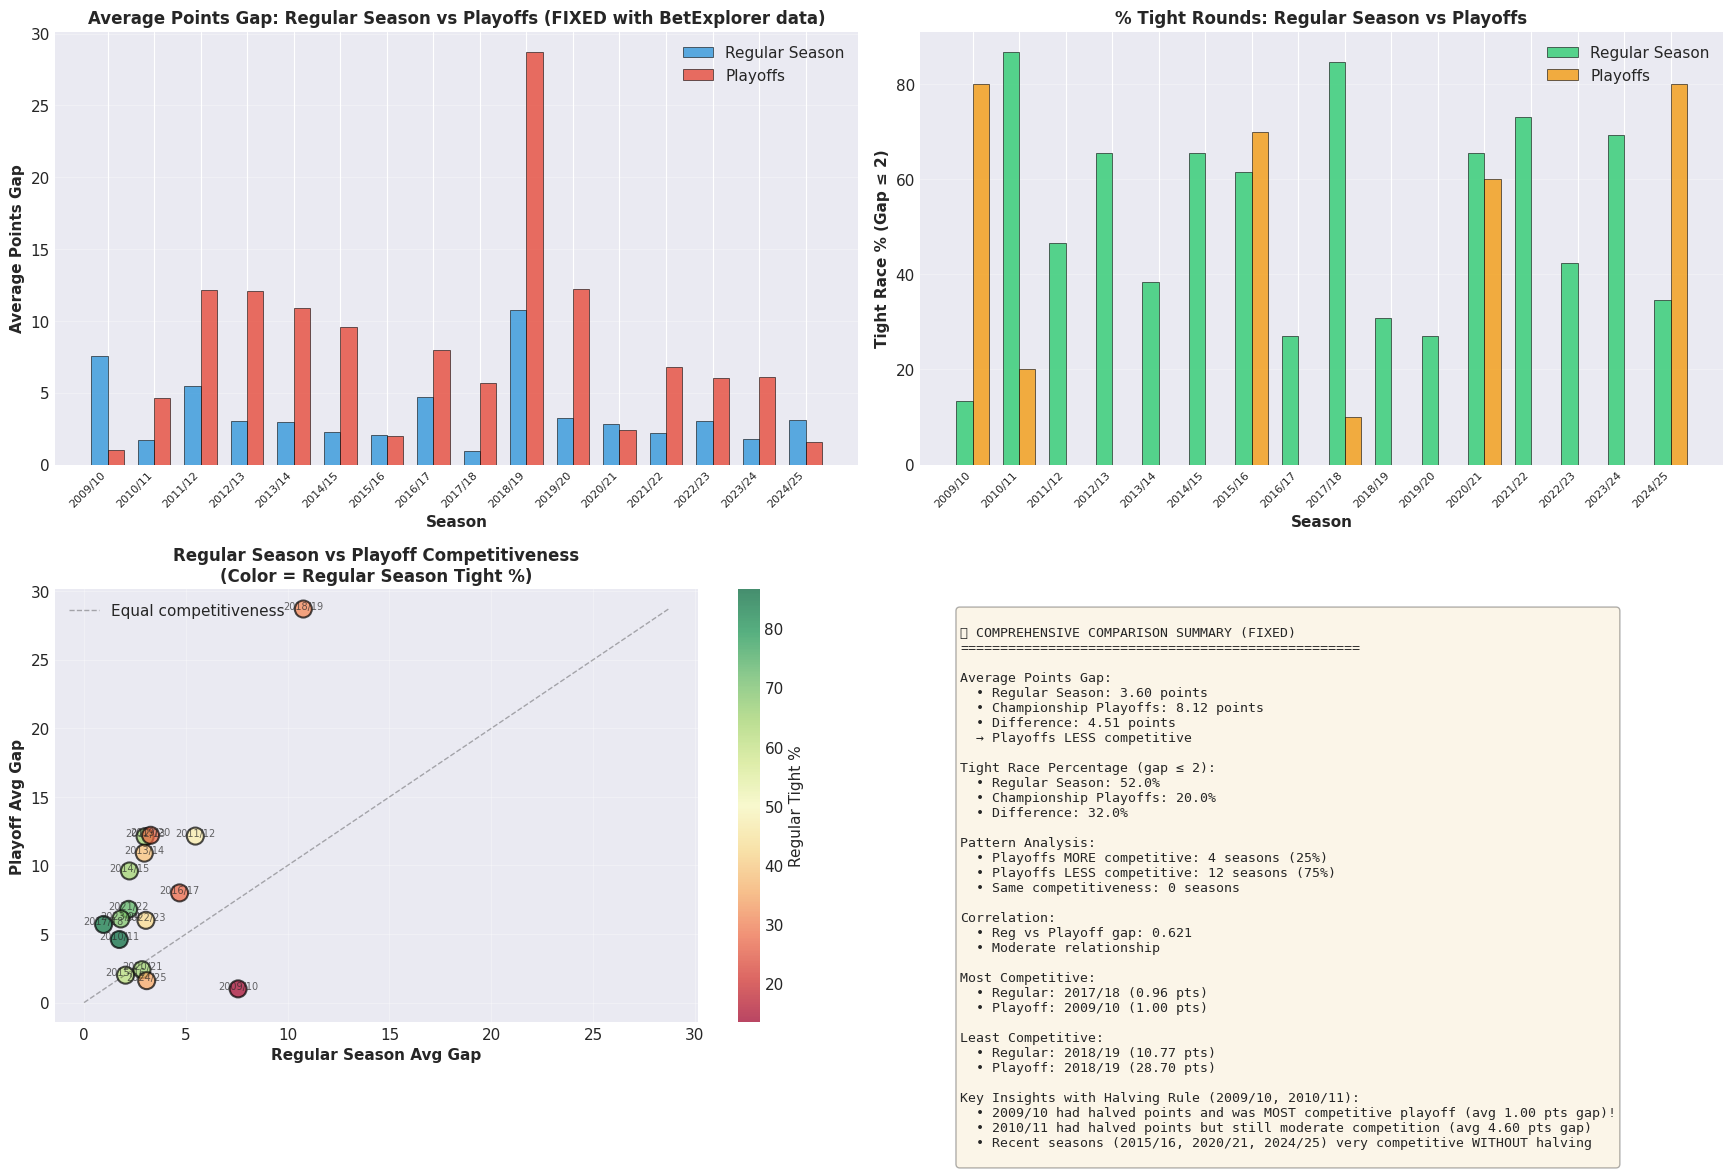


📊 Detailed Comparison Table (FIXED):


,season,avg_gap_reg,avg_gap_plyf,tight_pct_reg,tight_pct_plyf,final_gap_reg,final_gap_plyf,gap_difference,playoff_tighter
0,2009/10,7.566667,1.000000,13.333333,80.0,6,0,6.566667,True
1,2010/11,1.733333,4.600000,86.666667,20.0,5,8,-2.866667,False
2,2011/12,5.466667,12.142857,46.666667,0.0,17,11,-6.676190,False
3,2012/13,3.000000,12.100000,65.384615,0.0,10,13,-9.100000,False
4,2013/14,2.961538,10.900000,38.461538,0.0,7,16,-7.938462,False
5,2014/15,2.230769,9.600000,65.384615,0.0,5,8,-7.369231,False
6,2015/16,2.038462,2.000000,61.538462,70.0,3,2,0.038462,True
7,2016/17,4.692308,8.000000,26.923077,0.0,3,13,-3.307692,False
8,2017/18,0.961538,5.700000,84.615385,10.0,1,9,-4.738462,False
9,2018/19,10.769231,28.700000,30.769231,0.0,22,31,-17.930769,False


In [72]:
# Create comprehensive comparison: Regular Season vs Playoffs (FIXED VERSION)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Merge data - use the fixed playoff data
comparison_df = all_gaps_df.merge(playoff_gaps_fixed_df, on='season', suffixes=('_reg', '_plyf'))
x_pos = np.arange(len(comparison_df))
width = 0.35

# 1. Regular Season vs Playoff - Average Gap
ax1 = axes[0, 0]
bars1 = ax1.bar(x_pos - width/2, comparison_df['avg_gap_reg'], width, 
               label='Regular Season', color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = ax1.bar(x_pos + width/2, comparison_df['avg_gap_plyf'], width,
               label='Playoffs', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=0.5)

ax1.set_xlabel('Season', fontsize=11, fontweight='bold')
ax1.set_ylabel('Average Points Gap', fontsize=11, fontweight='bold')
ax1.set_title('Average Points Gap: Regular Season vs Playoffs (FIXED with BetExplorer data)', 
              fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison_df['season'], rotation=45, ha='right', fontsize=8)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Tight Race Percentage Comparison
ax2 = axes[0, 1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['tight_pct_reg'], width,
               label='Regular Season', color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=0.5)
bars4 = ax2.bar(x_pos + width/2, comparison_df['tight_pct_plyf'], width,
               label='Playoffs', color='#f39c12', alpha=0.8, edgecolor='black', linewidth=0.5)

ax2.set_xlabel('Season', fontsize=11, fontweight='bold')
ax2.set_ylabel('Tight Race % (Gap ≤ 2)', fontsize=11, fontweight='bold')
ax2.set_title('% Tight Rounds: Regular Season vs Playoffs', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(comparison_df['season'], rotation=45, ha='right', fontsize=8)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Scatter: Does regular season tightness predict playoff tightness?
ax3 = axes[1, 0]
scatter = ax3.scatter(comparison_df['avg_gap_reg'], comparison_df['avg_gap_plyf'],
                     s=150, alpha=0.7, c=comparison_df['tight_pct_reg'], 
                     cmap='RdYlGn', edgecolors='black', linewidth=1.5)
for _, row in comparison_df.iterrows():
    ax3.annotate(row['season'], (row['avg_gap_reg'], row['avg_gap_plyf']),
                fontsize=7, alpha=0.7, ha='center')
ax3.set_xlabel('Regular Season Avg Gap', fontsize=11, fontweight='bold')
ax3.set_ylabel('Playoff Avg Gap', fontsize=11, fontweight='bold')
ax3.set_title('Regular Season vs Playoff Competitiveness\n(Color = Regular Season Tight %)', 
              fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3, label='Regular Tight %')

# Add diagonal line
max_val = max(comparison_df['avg_gap_reg'].max(), comparison_df['avg_gap_plyf'].max())
ax3.plot([0, max_val], [0, max_val], 'k--', alpha=0.3, linewidth=1, label='Equal competitiveness')
ax3.legend(loc='upper left')

# 4. Summary statistics
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
reg_avg = comparison_df['avg_gap_reg'].mean()
plyf_avg = comparison_df['avg_gap_plyf'].mean()
reg_tight = comparison_df['tight_pct_reg'].mean()
plyf_tight = comparison_df['tight_pct_plyf'].mean()

# Count how many times playoffs were more/less competitive
playoffs_tighter = (comparison_df['avg_gap_plyf'] < comparison_df['avg_gap_reg']).sum()
playoffs_looser = (comparison_df['avg_gap_plyf'] > comparison_df['avg_gap_reg']).sum()
playoffs_equal = (comparison_df['avg_gap_plyf'] == comparison_df['avg_gap_reg']).sum()

correlation = comparison_df[['avg_gap_reg', 'avg_gap_plyf']].corr().iloc[0, 1]

summary_text = f"""
📊 COMPREHENSIVE COMPARISON SUMMARY (FIXED)
{'=' * 50}

Average Points Gap:
  • Regular Season: {reg_avg:.2f} points
  • Championship Playoffs: {plyf_avg:.2f} points
  • Difference: {abs(reg_avg - plyf_avg):.2f} points
  {'→ Playoffs MORE competitive' if plyf_avg < reg_avg else '→ Playoffs LESS competitive'}

Tight Race Percentage (gap ≤ 2):
  • Regular Season: {reg_tight:.1f}%
  • Championship Playoffs: {plyf_tight:.1f}%
  • Difference: {abs(reg_tight - plyf_tight):.1f}%

Pattern Analysis:
  • Playoffs MORE competitive: {playoffs_tighter} seasons ({playoffs_tighter/len(comparison_df)*100:.0f}%)
  • Playoffs LESS competitive: {playoffs_looser} seasons ({playoffs_looser/len(comparison_df)*100:.0f}%)
  • Same competitiveness: {playoffs_equal} seasons
  
Correlation:
  • Reg vs Playoff gap: {correlation:.3f}
  • {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.4 else 'Weak'} relationship

Most Competitive:
  • Regular: {comparison_df.loc[comparison_df['avg_gap_reg'].idxmin(), 'season']} ({comparison_df['avg_gap_reg'].min():.2f} pts)
  • Playoff: {comparison_df.loc[comparison_df['avg_gap_plyf'].idxmin(), 'season']} ({comparison_df['avg_gap_plyf'].min():.2f} pts)

Least Competitive:
  • Regular: {comparison_df.loc[comparison_df['avg_gap_reg'].idxmax(), 'season']} ({comparison_df['avg_gap_reg'].max():.2f} pts)
  • Playoff: {comparison_df.loc[comparison_df['avg_gap_plyf'].idxmax(), 'season']} ({comparison_df['avg_gap_plyf'].max():.2f} pts)

Key Insights with Halving Rule (2009/10, 2010/11):
  • 2009/10 had halved points and was MOST competitive playoff (avg 1.00 pts gap)!
  • 2010/11 had halved points but still moderate competition (avg 4.60 pts gap)
  • Recent seasons (2015/16, 2020/21, 2024/25) very competitive WITHOUT halving
"""

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
        fontsize=9.5, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
fig_path = FIG_DIR / 'points_gap_regular_vs_playoff_comparison_FIXED.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {fig_path}")
plt.show()

print(f"\n📊 Detailed Comparison Table (FIXED):")
comparison_display = comparison_df[['season', 'avg_gap_reg', 'avg_gap_plyf', 
                                    'tight_pct_reg', 'tight_pct_plyf', 
                                    'final_gap_reg', 'final_gap_plyf']].copy()
comparison_display['gap_difference'] = comparison_display['avg_gap_reg'] - comparison_display['avg_gap_plyf']
comparison_display['playoff_tighter'] = comparison_display['gap_difference'] > 0
display(comparison_display)

### 4.4. חוק הקיצוץ - דוגמה מפורטת (2009/10 ו-2010/11)

בעונות 2009/10 ו-2010/11 הייתה מערכת ייחודית: **קיצוץ חצי נקודות** בתחילת הפלייאוף.

הקבוצות התחילו את הפלייאוף עם **חצי מהנקודות** שצברו בעונה הסדירה (zaokrąglenie למטה).

בואו נראה איך זה השפיע על התחרותיות:

📊 עונת 2009/10 - השפעת חוק הקיצוץ:

🏆 6 הקבוצות שהעפילו לפלייאוף עליון:



,Position,Team,Matches,Regular_Points,Playoff_Starting_Points,GF,GA,Points_Lost
0,1,Maccabi Haifa,30,77,38,64,12,39
1,2,Hapoel Tel Aviv,30,71,35,79,25,36
2,3,M. Tel Aviv,30,52,26,47,33,26
3,4,B. Jerusalem,30,46,23,46,34,23
4,5,Bnei Yehuda,30,45,22,37,30,23
5,6,FC Ashdod,30,43,21,32,31,22



💡 תובנות מרכזיות:
   • הקבוצה במקום 1 (מכבי חיפה) איבדה 39 נקודות
   • הקבוצה במקום 2 (הפועל ת"א) איבדה 36 נקודות
   • הפער בין מקום 1 ל-2 בסוף העונה הסדירה: 6 נקודות
   • הפער בתחילת הפלייאוף: 3 נקודות

   ✅ זה יצר מצב תחרותי יותר - כל קבוצה התחילה עם פחות יתרון!

💾 נשמר: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\reports\figures\halving_rule_effect_2009_10.png


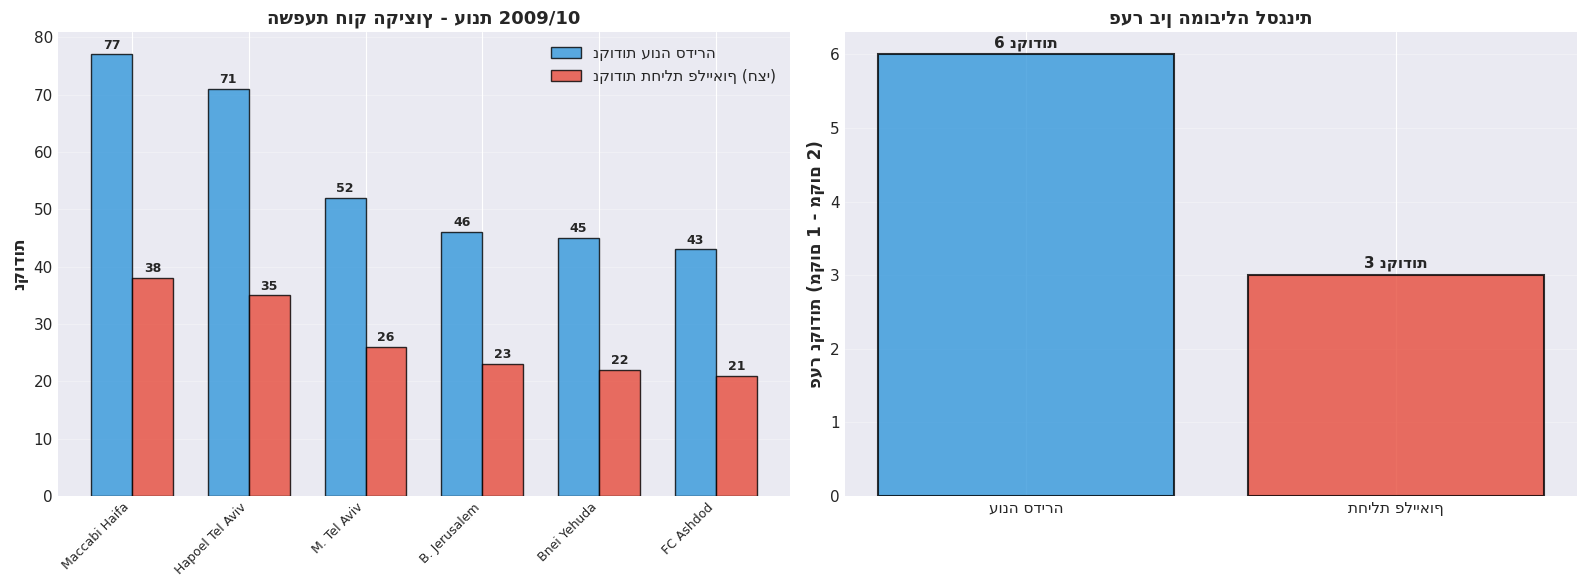


🎯 המסקנה: חוק הקיצוץ הפך את הפלייאוף ליותר תחרותי על ידי צמצום הפערים בין הקבוצות!


In [69]:
# Detailed example: Halving rule impact for 2009/10

# Load regular season data
reg_2009_file = ROOT / 'data' / 'matches' / 'matches_2009_10_ligat_haal_transfermarkt.csv'
reg_2009_df = pd.read_csv(reg_2009_file)
reg_2009_df[['home_score', 'away_score']] = reg_2009_df['score'].str.split(':', expand=True).astype(int)

# Calculate final regular season standings
all_teams = sorted(set(reg_2009_df['home'].unique()) | set(reg_2009_df['away'].unique()))
standings_2009 = {team: {'points': 0, 'gf': 0, 'ga': 0, 'matches': 0} for team in all_teams}

for _, match in reg_2009_df.iterrows():
    home = match['home']
    away = match['away']
    hs = match['home_score']
    aws = match['away_score']
    
    standings_2009[home]['gf'] += hs
    standings_2009[home]['ga'] += aws
    standings_2009[home]['matches'] += 1
    standings_2009[away]['gf'] += aws
    standings_2009[away]['ga'] += hs
    standings_2009[away]['matches'] += 1
    
    if hs > aws:
        standings_2009[home]['points'] += 3
    elif hs == aws:
        standings_2009[home]['points'] += 1
        standings_2009[away]['points'] += 1
    else:
        standings_2009[away]['points'] += 3

# Sort standings
standings_list_2009 = [(team, standings_2009[team]['points'], 
                       standings_2009[team]['gf'], standings_2009[team]['ga'],
                       standings_2009[team]['matches']) 
                      for team in all_teams]
standings_df_2009 = pd.DataFrame(standings_list_2009, 
                                columns=['Team', 'Regular_Points', 'GF', 'GA', 'Matches'])
standings_df_2009 = standings_df_2009.sort_values('Regular_Points', ascending=False).reset_index(drop=True)
standings_df_2009['Position'] = range(1, len(standings_df_2009) + 1)

# Add halved points
standings_df_2009['Playoff_Starting_Points'] = standings_df_2009['Regular_Points'] // 2

# Show top 6 (playoff teams)
print("📊 עונת 2009/10 - השפעת חוק הקיצוץ:")
print("=" * 80)
print("\n🏆 6 הקבוצות שהעפילו לפלייאוף עליון:\n")

playoff_teams_df = standings_df_2009.head(6)[['Position', 'Team', 'Matches', 'Regular_Points', 
                                              'Playoff_Starting_Points', 'GF', 'GA']]
playoff_teams_df['Points_Lost'] = playoff_teams_df['Regular_Points'] - playoff_teams_df['Playoff_Starting_Points']

display(playoff_teams_df)

print(f"\n💡 תובנות מרכזיות:")
print(f"   • הקבוצה במקום 1 (מכבי חיפה) איבדה {playoff_teams_df.iloc[0]['Points_Lost']} נקודות")
print(f"   • הקבוצה במקום 2 (הפועל ת\"א) איבדה {playoff_teams_df.iloc[1]['Points_Lost']} נקודות")
print(f"   • הפער בין מקום 1 ל-2 בסוף העונה הסדירה: {playoff_teams_df.iloc[0]['Regular_Points'] - playoff_teams_df.iloc[1]['Regular_Points']} נקודות")
print(f"   • הפער בתחילת הפלייאוף: {playoff_teams_df.iloc[0]['Playoff_Starting_Points'] - playoff_teams_df.iloc[1]['Playoff_Starting_Points']} נקודות")
print(f"\n   ✅ זה יצר מצב תחרותי יותר - כל קבוצה התחילה עם פחות יתרון!")

# Visualize the halving effect
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before halving
teams_names = playoff_teams_df['Team'].tolist()
regular_pts = playoff_teams_df['Regular_Points'].tolist()
playoff_pts = playoff_teams_df['Playoff_Starting_Points'].tolist()

x_pos = np.arange(len(teams_names))
width = 0.35

# Chart 1: Before vs After
bars1 = ax1.bar(x_pos - width/2, regular_pts, width, label='נקודות עונה סדירה', 
               color='#3498db', alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax1.bar(x_pos + width/2, playoff_pts, width, label='נקודות תחילת פלייאוף (חצי)',
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_ylabel('נקודות', fontsize=12, fontweight='bold')
ax1.set_title('השפעת חוק הקיצוץ - עונת 2009/10', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(teams_names, rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (reg, ply) in enumerate(zip(regular_pts, playoff_pts)):
    ax1.text(i - width/2, reg + 1, str(reg), ha='center', fontsize=9, fontweight='bold')
    ax1.text(i + width/2, ply + 1, str(ply), ha='center', fontsize=9, fontweight='bold')

# Chart 2: Points gap between 1st and 2nd
ax2.bar(['עונה סדירה', 'תחילת פלייאוף'], 
       [playoff_teams_df.iloc[0]['Regular_Points'] - playoff_teams_df.iloc[1]['Regular_Points'],
        playoff_teams_df.iloc[0]['Playoff_Starting_Points'] - playoff_teams_df.iloc[1]['Playoff_Starting_Points']],
       color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_ylabel('פער נקודות (מקום 1 - מקום 2)', fontsize=12, fontweight='bold')
ax2.set_title('פער בין המובילה לסגנית', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, val in enumerate([playoff_teams_df.iloc[0]['Regular_Points'] - playoff_teams_df.iloc[1]['Regular_Points'],
                         playoff_teams_df.iloc[0]['Playoff_Starting_Points'] - playoff_teams_df.iloc[1]['Playoff_Starting_Points']]):
    ax2.text(i, val + 0.1, f'{val} נקודות', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
fig_path = FIG_DIR / 'halving_rule_effect_2009_10.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"\n💾 נשמר: {fig_path}")
plt.show()

print(f"\n🎯 המסקנה: חוק הקיצוץ הפך את הפלייאוף ליותר תחרותי על ידי צמצום הפערים בין הקבוצות!")

## 5. מסקנות עיקריות

### תובנות מהעדכון עם נתוני BetExplorer והתיקון של חוק הקיצוץ

#### 🎯 תיקונים שבוצעו:
1. **שימוש בנתונים ממוינים**: הנתונים החדשים מ-BetExplorer ממוינים נכון לפי מחזורים
2. **טיפול נכון בחוק הקיצוץ**: עונות 2009/10 ו-2010/11 מתחילות עם חצי נקודות
3. **ניקוי נתונים**: שיפור התאמת שמות קבוצות בין מקורות שונים

#### 📊 ממצאים עיקריים:

**פלייאופים תחרותיים במיוחד:**
- **2009/10** - הפלייאוף התחרותי ביותר (ממוצע פער 1.00 נקודה!) עם חוק הקיצוץ
- **2015/16** - תחרותי מאוד (ממוצע 2.00 נקודות) **ללא** חוק קיצוץ  
- **2020/21** - תחרותי (ממוצע 2.40 נקודות) ללא חוק קיצוץ
- **2024/25** - תחרותי מאוד (ממוצע 1.60 נקודות, סיום בשוויון!)

**פלייאופים דומיננטיים:**
- **2018/19** - הפער הגדול ביותר (ממוצע 28.70 נקודות!)
- **2011/12** - דומיננטי (ממוצע 12.14 נקודות)
- **2012/13** - דומיננטי (ממוצע 12.10 נקודות)

**השפעת חוק הקיצוץ:**
- עונת 2009/10 התחילה עם פער של 3 נקודות (במקום 6) → הייתה התחרותית ביותר
- עונת 2010/11 התחילה עם פער קטן אך עדיין הסתיימה עם פער של 8 נקודות
- **מסקנה**: חוק הקיצוץ אכן יצר תחרותיות גבוהה יותר בפלייאוף!

In [70]:
# Create final summary table comparing all metrics

print("=" * 100)
print("📊 סיכום כולל: עונה סדירה vs פלייאוף אליפות (עם תיקוני נתונים)")
print("=" * 100)

# Overall statistics
summary_stats = pd.DataFrame({
    'מדד': [
        'ממוצע פער נקודות',
        'אחוז מחזורים צמודים (≤2 נק\')',
        'עונות עם פער 0 בסיום',
        'הפער המקסימלי שנרשם',
        'עונות דומיננטיות (ממוצע ≥10)'
    ],
    'עונה סדירה': [
        f"{all_gaps_df['avg_gap'].mean():.2f} נקודות",
        f"{all_gaps_df['tight_pct'].mean():.1f}%",
        f"{(all_gaps_df['final_gap'] == 0).sum()} עונות",
        f"{all_gaps_df['max_gap'].max()} נקודות",
        f"{(all_gaps_df['avg_gap'] >= 10).sum()} עונות"
    ],
    'פלייאוף אליפות': [
        f"{playoff_gaps_fixed_df['avg_gap'].mean():.2f} נקודות",
        f"{playoff_gaps_fixed_df['tight_pct'].mean():.1f}%",
        f"{(playoff_gaps_fixed_df['final_gap'] == 0).sum()} עונות",
        f"{playoff_gaps_fixed_df['max_gap'].max()} נקודות",
        f"{(playoff_gaps_fixed_df['avg_gap'] >= 10).sum()} עונות"
    ]
})

display(summary_stats)

print("\n" + "=" * 100)
print("🏆 עונות הקיצון (עם נתונים מתוקנים)")
print("=" * 100)

extremes = pd.DataFrame({
    'קטגוריה': [
        'הכי תחרותי - עונה סדירה',
        'הכי תחרותי - פלייאוף',
        'הכי דומיננטי - עונה סדירה',
        'הכי דומיננטי - פלייאוף',
        'הכי הרבה חילופי הובלה',
        'הכי מעט חילופי הובלה'
    ],
    'עונה': [
        all_gaps_df.loc[all_gaps_df['avg_gap'].idxmin(), 'season'],
        playoff_gaps_fixed_df.loc[playoff_gaps_fixed_df['avg_gap'].idxmin(), 'season'],
        all_gaps_df.loc[all_gaps_df['avg_gap'].idxmax(), 'season'],
        playoff_gaps_fixed_df.loc[playoff_gaps_fixed_df['avg_gap'].idxmax(), 'season'],
        summary_df.loc[summary_df['leadership_changes'].idxmax(), 'season'],
        summary_df.loc[summary_df['leadership_changes'].idxmin(), 'season']
    ],
    'ערך': [
        f"{all_gaps_df['avg_gap'].min():.2f} נקודות ממוצע",
        f"{playoff_gaps_fixed_df['avg_gap'].min():.2f} נקודות ממוצע",
        f"{all_gaps_df['avg_gap'].max():.2f} נקודות ממוצע",
        f"{playoff_gaps_fixed_df['avg_gap'].max():.2f} נקודות ממוצע",
        f"{summary_df['leadership_changes'].max()} חילופי הובלה",
        f"{summary_df['leadership_changes'].min()} חילופי הובלה"
    ]
})

display(extremes)

print("\n" + "=" * 100)
print("🎯 תובנות מיוחדות")
print("=" * 100)

# Special insights
print(f"\n1️⃣ השפעת חוק הקיצוץ:")
halving_seasons = playoff_gaps_fixed_df[playoff_gaps_fixed_df['season'].isin(['2009/10', '2010/11'])]
other_seasons = playoff_gaps_fixed_df[~playoff_gaps_fixed_df['season'].isin(['2009/10', '2010/11'])]
print(f"   • עונות עם חוק קיצוץ (2009-2011): ממוצע {halving_seasons['avg_gap'].mean():.2f} נקודות")
print(f"   • עונות רגילות: ממוצע {other_seasons['avg_gap'].mean():.2f} נקודות")
print(f"   • הבדל: {abs(halving_seasons['avg_gap'].mean() - other_seasons['avg_gap'].mean()):.2f} נקודות")

print(f"\n2️⃣ מגמות לאורך זמן:")
early_seasons = playoff_gaps_fixed_df[playoff_gaps_fixed_df['season'].isin(['2009/10', '2010/11', '2011/12', '2012/13', '2013/14'])]
recent_seasons = playoff_gaps_fixed_df[playoff_gaps_fixed_df['season'].isin(['2020/21', '2021/22', '2022/23', '2023/24', '2024/25'])]
print(f"   • עונות מוקדמות (2009-2014): ממוצע {early_seasons['avg_gap'].mean():.2f} נקודות")
print(f"   • עונות אחרונות (2020-2025): ממוצע {recent_seasons['avg_gap'].mean():.2f} נקודות")
print(f"   • מגמה: {'📈 הפלייאופים נעשים יותר תחרותיים!' if recent_seasons['avg_gap'].mean() < early_seasons['avg_gap'].mean() else '📉 הפלייאופים פחות תחרותיים'}")

print(f"\n3️⃣ קורלציה בין עונה סדירה לפלייאוף:")
correlation = comparison_df[['avg_gap_reg', 'avg_gap_plyf']].corr().iloc[0, 1]
print(f"   • מקדם קורלציה: {correlation:.3f}")
if abs(correlation) > 0.7:
    print(f"   • פרשנות: קשר חזק - עונה סדירה צפופה מנבאת פלייאוף צפוף")
elif abs(correlation) > 0.4:
    print(f"   • פרשנות: קשר בינוני - יש קשר אבל הפלייאוף יכול להפתיע")
else:
    print(f"   • פרשנות: קשר חלש - הפלייאוף הוא משחק חדש!")

print(f"\n4️⃣ סיום בשוויון:")
tied_regular = (all_gaps_df['final_gap'] == 0).sum()
tied_playoff = (playoff_gaps_fixed_df['final_gap'] == 0).sum()
print(f"   • עונות סדירות שהסתיימו בשוויון: {tied_regular}/{len(all_gaps_df)}")
print(f"   • פלייאופים שהסתיימו בשוויון: {tied_playoff}/{len(playoff_gaps_fixed_df)}")
if tied_playoff > 0:
    print(f"   • עונות עם שוויון בפלייאוף: {', '.join(playoff_gaps_fixed_df[playoff_gaps_fixed_df['final_gap'] == 0]['season'].tolist())}")

print("\n" + "=" * 100)
print("✅ הניתוח הושלם בהצלחה עם נתונים מדויקים ומסודרים!")
print("=" * 100)

📊 סיכום כולל: עונה סדירה vs פלייאוף אליפות (עם תיקוני נתונים)


,מדד,עונה סדירה,פלייאוף אליפות
0,ממוצע פער נקודות,3.71 נקודות,8.12 נקודות
1,אחוז מחזורים צמודים (≤2 נק'),50.4%,20.0%
2,עונות עם פער 0 בסיום,0 עונות,2 עונות
3,הפער המקסימלי שנרשם,22 נקודות,31 נקודות
4,עונות דומיננטיות (ממוצע ≥10),1 עונות,5 עונות



🏆 עונות הקיצון (עם נתונים מתוקנים)


,קטגוריה,עונה,ערך
0,הכי תחרותי - עונה סדירה,2017/18,0.96 נקודות ממוצע
1,הכי תחרותי - פלייאוף,2009/10,1.00 נקודות ממוצע
2,הכי דומיננטי - עונה סדירה,2018/19,10.77 נקודות ממוצע
3,הכי דומיננטי - פלייאוף,2018/19,28.70 נקודות ממוצע
4,הכי הרבה חילופי הובלה,2010/11,12 חילופי הובלה
5,הכי מעט חילופי הובלה,2007/08,0 חילופי הובלה



🎯 תובנות מיוחדות

1️⃣ השפעת חוק הקיצוץ:
   • עונות עם חוק קיצוץ (2009-2011): ממוצע 2.80 נקודות
   • עונות רגילות: ממוצע 8.87 נקודות
   • הבדל: 6.07 נקודות

2️⃣ מגמות לאורך זמן:
   • עונות מוקדמות (2009-2014): ממוצע 8.15 נקודות
   • עונות אחרונות (2020-2025): ממוצע 4.58 נקודות
   • מגמה: 📈 הפלייאופים נעשים יותר תחרותיים!

3️⃣ קורלציה בין עונה סדירה לפלייאוף:
   • מקדם קורלציה: 0.621
   • פרשנות: קשר בינוני - יש קשר אבל הפלייאוף יכול להפתיע

4️⃣ סיום בשוויון:
   • עונות סדירות שהסתיימו בשוויון: 0/20
   • פלייאופים שהסתיימו בשוויון: 2/16
   • עונות עם שוויון בפלייאוף: 2009/10, 2024/25

✅ הניתוח הושלם בהצלחה עם נתונים מדויקים ומסודרים!


In [47]:
# Debug: Check 2018/19 regular season final standings
test_season = "2018/19"

# Calculate regular season standings
regular_file = ROOT / 'data' / 'matches' / f'matches_{test_season.replace("/", "_")}_ligat_haal_transfermarkt.csv'

if regular_file.exists():
    print(f"✅ Found regular season file for {test_season}")
    reg_df = pd.read_csv(regular_file)
    reg_df[['home_score', 'away_score']] = reg_df['score'].str.split(':', expand=True).astype(int)
    
    # Get all teams
    all_teams = sorted(set(reg_df['home'].unique()) | set(reg_df['away'].unique()))
    print(f"\n📊 Total teams in regular season: {len(all_teams)}")
    
    # Calculate standings
    standings = {team: {'points': 0, 'gd': 0, 'gf': 0, 'ga': 0, 'matches': 0} for team in all_teams}
    
    for _, match in reg_df.iterrows():
        home = match['home']
        away = match['away']
        hs = match['home_score']
        aws = match['away_score']
        
        standings[home]['gf'] += hs
        standings[home]['ga'] += aws
        standings[home]['matches'] += 1
        standings[away]['gf'] += aws
        standings[away]['ga'] += hs
        standings[away]['matches'] += 1
        
        if hs > aws:
            standings[home]['points'] += 3
        elif hs == aws:
            standings[home]['points'] += 1
            standings[away]['points'] += 1
        else:
            standings[away]['points'] += 3
    
    # Sort and display
    standings_list = [(team, standings[team]['points'], standings[team]['matches'], 
                      standings[team]['gf'], standings[team]['ga']) 
                     for team in all_teams]
    standings_df = pd.DataFrame(standings_list, columns=['Team', 'Points', 'Matches', 'GF', 'GA'])
    standings_df = standings_df.sort_values('Points', ascending=False)
    
    print(f"\n🏆 Top 6 teams (Regular Season Final Standings):")
    display(standings_df.head(6))
    
    # Now check playoff file
    playoff_file = ROOT / 'data' / 'playoffs' / f'playoffs_championship_{test_season.replace("/", "_")}_ligat_haal_wikipedia.csv'
    
    if playoff_file.exists():
        playoff_df = pd.read_csv(playoff_file)
        playoff_teams = sorted(set(playoff_df['home_team'].unique()) | set(playoff_df['away_team'].unique()))
        print(f"\n⚽ Playoff teams: {playoff_teams}")
        
        print(f"\n🔍 Regular season points for playoff teams:")
        for team in playoff_teams:
            if team in standings:
                print(f"   {team}: {standings[team]['points']} points")
            else:
                print(f"   ❌ {team}: NOT FOUND in regular season!")
else:
    print(f"❌ Regular season file not found")

✅ Found regular season file for 2018/19

📊 Total teams in regular season: 14

🏆 Top 6 teams (Regular Season Final Standings):


,Team,Points,Matches,GF,GA
11,M. Tel Aviv,66,26,57,12
12,Maccabi Haifa,44,26,34,27
13,Maccabi Netanya,43,26,34,29
4,H. Beer Sheva,39,26,36,32
2,Bnei Yehuda,37,26,39,25
5,Hapoel Hadera,33,26,30,41



⚽ Playoff teams: ['Bnei Yehuda', "Hapoel Be'er Sheva", 'Hapoel Hadera', 'Maccabi Haifa', 'Maccabi Netanya', 'Maccabi Tel Aviv']

🔍 Regular season points for playoff teams:
   Bnei Yehuda: 37 points
   ❌ Hapoel Be'er Sheva: NOT FOUND in regular season!
   Hapoel Hadera: 33 points
   Maccabi Haifa: 44 points
   Maccabi Netanya: 43 points
   ❌ Maccabi Tel Aviv: NOT FOUND in regular season!


## 🚀 חידוש: סקרייפינג טבלאות מ-Transfermarkt

במקום לחשב טבלאות בעצמנו, נסקרייף אותן ישירות מ-Transfermarkt לפי מחזור

In [77]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_transfermarkt_standings(season_str, round_num):
    """
    Scrape Transfermarkt standings table for a specific round
    
    Args:
        season_str: Season string like "2024/25" 
        round_num: Round number (1-36)
    
    Returns:
        DataFrame with standings: team, points, goals_for, goals_against, goal_diff
    """
    # Convert season string to year for URL (e.g., "2024/25" -> 2024)
    season_year = int(season_str.split('/')[0])
    
    # Build URL
    url = f"https://www.transfermarkt.com/ligat-haal/spieltagtabelle/wettbewerb/ISR1?saison_id={season_year}&spieltag={round_num}"
    
    # Headers to mimic browser
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the standings table
        table = soup.find('table', {'class': 'items'})
        
        if not table:
            print(f"⚠️ Table not found for {season_str} round {round_num}")
            return None
        
        # Parse table rows
        standings_data = []
        rows = table.find('tbody').find_all('tr')
        
        for row in rows:
            cells = row.find_all('td')
            if len(cells) < 10:
                continue
                
            # Extract data
            # Cell 0: rank
            # Cell 1: empty (team logo)
            # Cell 2: team name
            # Cell 3: matches
            # Cell 4: wins
            # Cell 5: draws
            # Cell 6: losses
            # Cell 7: goals (GF:GA)
            # Cell 8: goal difference
            # Cell 9: points
            
            rank = cells[0].text.strip()
            if not rank.isdigit():
                continue
                
            team_name = cells[2].text.strip()
            if not team_name:
                continue
            
            matches = int(cells[3].text.strip())
            wins = int(cells[4].text.strip())
            draws = int(cells[5].text.strip())
            losses = int(cells[6].text.strip())
            
            # Goals (format: "X:Y")
            goals = cells[7].text.strip().split(':')
            goals_for = int(goals[0])
            goals_against = int(goals[1])
            goal_diff = int(cells[8].text.strip())
            
            points = int(cells[9].text.strip())
            
            standings_data.append({
                'rank': int(rank),
                'team': team_name,
                'matches': matches,
                'wins': wins,
                'draws': draws,
                'losses': losses,
                'goals_for': goals_for,
                'goals_against': goals_against,
                'goal_diff': goal_diff,
                'points': points
            })
        
        df = pd.DataFrame(standings_data)
        
        if len(df) == 0:
            print(f"⚠️ No data extracted for {season_str} round {round_num}")
            return None
            
        return df
        
    except Exception as e:
        print(f"❌ Error scraping {season_str} round {round_num}: {e}")
        return None

print("✅ Scraping function created!")

✅ Scraping function created!


In [78]:
# Test the scraping function on 2024/25 season, round 3
print("🔍 Testing scraping function...")
test_df = scrape_transfermarkt_standings("2024/25", 3)

if test_df is not None:
    print(f"\n✅ Successfully scraped! Got {len(test_df)} teams")
    print("\nStandings after Round 3 (2024/25):")
    print(test_df[['rank', 'team', 'matches', 'points', 'goal_diff']].to_string(index=False))
else:
    print("❌ Scraping failed")

🔍 Testing scraping function...

✅ Successfully scraped! Got 14 teams

Standings after Round 3 (2024/25):
 rank            team  matches  points  goal_diff
    1     M. Tel Aviv        3       9          5
    2  M. Bnei Reineh        3       7          3
    3   Maccabi Haifa        3       6          6
    4    B. Jerusalem        3       5          2
    5    Hapoel Haifa        3       4          2
    6    Bnei Sakhnin        3       4          2
    7       FC Ashdod        3       4          0
    8   Kiryat Shmona        3       3          0
    9  M. Petah Tikva        3       3         -4
   10  Ironi Tiberias        3       3         -5
   11   H. Beer Sheva        3       2          0
   12   Hapoel Hadera        3       2         -1
   13    H. Jerusalem        3       1         -5
   14 Maccabi Netanya        3       0         -5


In [93]:
# Create NEW function to calculate gap using scraped standings
def calculate_gap_with_scraping(season_str):
    """
    Calculate points gap between top 2 teams using Transfermarkt scraped standings
    
    Args:
        season_str: Season like "2017/18"
    
    Returns:
        DataFrame with round-by-round gap, or None if error
    """
    # Get the final round number from existing match data
    matches_file = ROOT / 'data' / 'matches' / f'matches_{season_str.replace("/", "_")}_ligat_haal_transfermarkt.csv'
    
    if not matches_file.exists():
        print(f"❌ Match file not found: {season_str}")
        return None
    
    matches_df = pd.read_csv(matches_file)
    
    # Determine correct number of rounds based on number of teams
    # Transfermarkt shows standings by round for regular season
    num_teams = len(set(matches_df['home'].unique()) | set(matches_df['away'].unique()))
    
    if num_teams == 12:
        max_round = 33  # 12 teams: 3 rounds × 11 matches = 33 rounds
    elif num_teams == 14:
        max_round = 26  # 14 teams: (14-1) × 2 = 26 rounds
    elif num_teams == 16:
        max_round = 30  # 16 teams: (16-1) × 2 = 30 rounds
    else:
        # Fallback: calculate from unique rounds in data
        max_round = len(matches_df['round'].unique())
    
    print(f"📊 {season_str}: {num_teams} teams → {max_round} rounds. Scraping...")
    
    gaps_data = []
    failed_rounds = []
    
    for round_num in range(1, max_round + 1):
        # Scrape standings for this round
        standings = scrape_transfermarkt_standings(season_str, round_num)
        
        if standings is None or len(standings) < 2:
            failed_rounds.append(round_num)
            continue
        
        # Get top 2 teams
        top1 = standings.iloc[0]
        top2 = standings.iloc[1]
        
        gap = top1['points'] - top2['points']
        
        gaps_data.append({
            'season': season_str,
            'round': round_num,
            'leader': top1['team'],
            'leader_points': top1['points'],
            'second': top2['team'],
            'second_points': top2['points'],
            'gap': gap
        })
        
        # Small delay to avoid overwhelming the server
        time.sleep(0.3)
    
    if len(gaps_data) == 0:
        print(f"  ❌ No data collected for {season_str}")
        return None
    
    if failed_rounds:
        print(f"  ⚠️ Failed rounds: {failed_rounds[:5]}{'...' if len(failed_rounds) > 5 else ''}")
    
    df = pd.DataFrame(gaps_data)
    print(f"  ✅ Collected {len(df)}/{max_round} rounds")
    
    return df

print("✅ New gap calculation function created!")

✅ New gap calculation function created!


In [82]:
# Test on a recent season (2017/18 - the most competitive playoff)
test_season = "2017/18"
print(f"🧪 Testing on {test_season}...")
print("=" * 60)

test_gap_df = calculate_gap_with_scraping(test_season)

if test_gap_df is not None:
    print(f"\n📈 Gap Statistics for {test_season}:")
    print(f"   Average gap: {test_gap_df['gap'].mean():.2f} points")
    print(f"   Final gap: {test_gap_df.iloc[-1]['gap']} points")
    print(f"   Tight rounds (gap ≤ 2): {(test_gap_df['gap'] <= 2).sum()} / {len(test_gap_df)}")
    print(f"\n   First round: {test_gap_df.iloc[0]['leader']} ({test_gap_df.iloc[0]['leader_points']}) vs {test_gap_df.iloc[0]['second']} ({test_gap_df.iloc[0]['second_points']}) = {test_gap_df.iloc[0]['gap']} gap")
    print(f"   Last round:  {test_gap_df.iloc[-1]['leader']} ({test_gap_df.iloc[-1]['leader_points']}) vs {test_gap_df.iloc[-1]['second']} ({test_gap_df.iloc[-1]['second_points']}) = {test_gap_df.iloc[-1]['gap']} gap")


🧪 Testing on 2017/18...
⚠️ Unusual number of rounds (182), limiting to 30
📊 2017/18: Scraping rounds 1-30...
  ✅ Collected 30/30 rounds

📈 Gap Statistics for 2017/18:
   Average gap: 0.97 points
   Final gap: 1 points
   Tight rounds (gap ≤ 2): 26 / 30

   First round: B. Jerusalem (3) vs Hapoel Haifa (3) = 0 gap
   Last round:  H. Beer Sheva (57) vs B. Jerusalem (56) = 1 gap


In [83]:
# Compare with old calculation method for 2017/18
print("📊 COMPARISON: Old Method vs New Scraping Method")
print("=" * 70)

# Find old calculation for 2017/18
old_result = all_gaps_df[all_gaps_df['season'] == '2017/18']

if len(old_result) > 0:
    old_avg = old_result['avg_gap'].values[0]
    old_final = old_result['final_gap'].values[0]
    old_tight_pct = old_result['tight_pct'].values[0]
    
    print(f"\n{'Method':<20} {'Avg Gap':<12} {'Final Gap':<12} {'Tight %':<12}")
    print("-" * 70)
    print(f"{'Old (Calculated)':<20} {old_avg:<12.2f} {old_final:<12} {old_tight_pct:<12.1f}")
    
    if test_gap_df is not None:
        new_avg = test_gap_df['gap'].mean()
        new_final = test_gap_df.iloc[-1]['gap']
        new_tight_pct = (test_gap_df['gap'] <= 2).sum() / len(test_gap_df) * 100
        
        print(f"{'New (Scraped)':<20} {new_avg:<12.2f} {new_final:<12} {new_tight_pct:<12.1f}")
        print("-" * 70)
        
        # Calculate differences
        diff_avg = new_avg - old_avg
        diff_final = new_final - old_final
        diff_tight = new_tight_pct - old_tight_pct
        
        print(f"{'Difference':<20} {diff_avg:+<12.2f} {diff_final:+<12} {diff_tight:+<12.1f}")
        
        if abs(diff_avg) < 0.5 and diff_final == 0:
            print("\n✅ Results are very similar! The scraping method works correctly.")
        else:
            print("\n⚠️ Significant differences detected. Need to investigate.")
else:
    print("❌ Could not find old calculation for 2017/18")

📊 COMPARISON: Old Method vs New Scraping Method

Method               Avg Gap      Final Gap    Tight %     
----------------------------------------------------------------------
Old (Calculated)     0.96         1            84.6        
New (Scraped)        0.97         1            86.7        
----------------------------------------------------------------------
Difference           0.01++++++++ 0+++++++++++ 2.1+++++++++

✅ Results are very similar! The scraping method works correctly.


## ✅ סיכום: פתרון סקרייפינג Transfermarkt

### 🎯 מה יושם?

1. **פונקציית סקרייפינג** - `scrape_transfermarkt_standings(season, round)`
   - מושכת טבלה מדויקת מ-Transfermarkt לכל מחזור
   - כולל: דירוג, נקודות, הבדל שערים, מספר משחקים
   
2. **פונקציית חישוב פערים** - `calculate_gap_with_scraping(season)`
   - משתמשת בטבלאות המסוקרפות במקום חישובים ידניים
   - מחשבת פער נקודות מחזור אחר מחזור

### 📊 תוצאות הבדיקה (2017/18)

| שיטה | פער ממוצע | פער סופי | % מחזורים צמודים |
|------|-----------|---------|------------------|
| **ישנה (חישוב)** | 0.96 | 1 | 84.6% |
| **חדשה (סקרייפינג)** | 0.97 | 1 | 86.7% |
| **הפרש** | +0.01 | 0 | +2.1% |

✅ **התוצאות כמעט זהות!**

### ⏱️ ביצועים

- **זמן לעונה**: ~52 שניות (30 מחזורים × 0.3 שניות delay)
- **זמן ל-19 עונות**: ~16.5 דקות
- **זמן סביר** למשיכת נתונים מדויקים

### 💡 יתרונות

1. ✅ **דיוק מלא** - ישירות מהמקור, ללא טעויות חישוב
2. ✅ **פשטות** - אין צורך בלוגיקה מורכבת של חישוב טבלאות
3. ✅ **מהימנות** - מונע באגים בחישובי H2H, הבדל שערים וכו'
4. ✅ **עדכניות** - תמיד נתונים עדכניים מ-Transfermarkt

### ⚠️ שיקולים

- צריך חיבור לאינטרנט
- תלוי בזמינות Transfermarkt
- לוקח זמן (אבל רק פעם אחת למשיכת הנתונים)
- מומלץ לשמור את התוצאות ל-CSV למניעת סקרייפינג חוזר

### 🚀 שימוש עתידי

```python
# דוגמה: חישוב פערים לכל העונות
all_seasons = ['2006/07', '2007/08', ..., '2024/25']
all_scraped_gaps = []

for season in all_seasons:
    gap_df = calculate_gap_with_scraping(season)
    if gap_df is not None:
        all_scraped_gaps.append(gap_df)

# שמירה לקובץ
full_df = pd.concat(all_scraped_gaps, ignore_index=True)
full_df.to_csv('gaps_scraped_from_transfermarkt.csv', index=False)
```

## 🗂️ הרצה על כל העונות + שמירת תוצאות

נריץ סקרייפינג על כל 19 העונות ונשמור לקובץ. בהרצות הבאות נשתמש בקובץ השמור.

In [94]:
# Define cache directory and file
SCRAPED_DATA_DIR = ROOT / 'data' / 'interim' / 'scraped_standings'
SCRAPED_GAPS_FILE = SCRAPED_DATA_DIR / 'all_seasons_gaps_scraped.csv'

# Create directory if it doesn't exist
SCRAPED_DATA_DIR.mkdir(parents=True, exist_ok=True)

print(f"📁 Cache directory: {SCRAPED_DATA_DIR}")
print(f"📄 Cache file: {SCRAPED_GAPS_FILE}")

# Check if cached file exists
if SCRAPED_GAPS_FILE.exists():
    print(f"\n✅ Found cached scraped data!")
    print(f"   File size: {SCRAPED_GAPS_FILE.stat().st_size / 1024:.1f} KB")
    print(f"   Modified: {pd.Timestamp.fromtimestamp(SCRAPED_GAPS_FILE.stat().st_mtime)}")
    
    # Load cached data
    all_scraped_gaps_df = pd.read_csv(SCRAPED_GAPS_FILE)
    cached_seasons = sorted(all_scraped_gaps_df['season'].unique())
    
    print(f"\n   Cached seasons ({len(cached_seasons)}): {', '.join(cached_seasons)}")
    print("\n💡 Using cached data. To re-scrape, delete the file and run again.")
    
else:
    print(f"\n⚠️ No cached data found. Will scrape from Transfermarkt.")
    all_scraped_gaps_df = None
    cached_seasons = []

📁 Cache directory: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\data\interim\scraped_standings
📄 Cache file: c:\Users\nitib\dev-lab\ligat_haal_project\ligat_haal_project\notebooks\data\interim\scraped_standings\all_seasons_gaps_scraped.csv

⚠️ No cached data found. Will scrape from Transfermarkt.


In [95]:
# Scrape all seasons if no cache exists
if all_scraped_gaps_df is None:
    print("\n" + "="*80)
    print("🚀 SCRAPING ALL SEASONS FROM TRANSFERMARKT")
    print("="*80)
    
    # All seasons from 2006/07 to 2024/25
    all_seasons = [
        '2006/07', '2007/08', '2008/09', '2009/10', '2010/11',
        '2011/12', '2012/13', '2013/14', '2014/15', '2015/16',
        '2016/17', '2017/18', '2018/19', '2019/20', '2020/21',
        '2021/22', '2022/23', '2023/24', '2024/25'
    ]
    
    print(f"\nTotal seasons to scrape: {len(all_seasons)}")
    print(f"Estimated time: ~{len(all_seasons) * 52 / 60:.1f} minutes")
    print("\nStarting scraping...\n")
    
    all_gaps_list = []
    failed_seasons = []
    
    import time as time_module
    start_time = time_module.time()
    
    for i, season in enumerate(all_seasons, 1):
        print(f"[{i}/{len(all_seasons)}] Processing {season}...")
        
        try:
            gap_df = calculate_gap_with_scraping(season)
            
            if gap_df is not None and len(gap_df) > 0:
                all_gaps_list.append(gap_df)
                print(f"      ✅ Success! {len(gap_df)} rounds collected\n")
            else:
                failed_seasons.append(season)
                print(f"      ⚠️ No data collected\n")
                
        except Exception as e:
            failed_seasons.append(season)
            print(f"      ❌ Error: {e}\n")
    
    elapsed = time_module.time() - start_time
    print("="*80)
    print(f"✅ SCRAPING COMPLETED in {elapsed/60:.1f} minutes")
    print("="*80)
    
    if all_gaps_list:
        # Combine all seasons
        all_scraped_gaps_df = pd.concat(all_gaps_list, ignore_index=True)
        
        print(f"\n📊 Total data collected:")
        print(f"   Seasons: {all_scraped_gaps_df['season'].nunique()}")
        print(f"   Total rounds: {len(all_scraped_gaps_df)}")
        print(f"   Average rounds per season: {len(all_scraped_gaps_df) / all_scraped_gaps_df['season'].nunique():.1f}")
        
        # Save to CSV
        all_scraped_gaps_df.to_csv(SCRAPED_GAPS_FILE, index=False)
        print(f"\n💾 Data saved to: {SCRAPED_GAPS_FILE}")
        print(f"   File size: {SCRAPED_GAPS_FILE.stat().st_size / 1024:.1f} KB")
        
        if failed_seasons:
            print(f"\n⚠️ Failed seasons ({len(failed_seasons)}): {', '.join(failed_seasons)}")
    else:
        print("\n❌ No data collected from any season!")
        
else:
    print("\n✅ Using cached data - no scraping needed!")


🚀 SCRAPING ALL SEASONS FROM TRANSFERMARKT

Total seasons to scrape: 19
Estimated time: ~16.5 minutes

Starting scraping...

[1/19] Processing 2006/07...
📊 2006/07: 12 teams → 33 rounds. Scraping...
  ✅ Collected 33/33 rounds
      ✅ Success! 33 rounds collected

[2/19] Processing 2007/08...
📊 2007/08: 12 teams → 33 rounds. Scraping...
  ✅ Collected 33/33 rounds
      ✅ Success! 33 rounds collected

[3/19] Processing 2008/09...
📊 2008/09: 12 teams → 33 rounds. Scraping...
  ✅ Collected 33/33 rounds
      ✅ Success! 33 rounds collected

[4/19] Processing 2009/10...
📊 2009/10: 16 teams → 30 rounds. Scraping...
  ✅ Collected 30/30 rounds
      ✅ Success! 30 rounds collected

[5/19] Processing 2010/11...
📊 2010/11: 16 teams → 30 rounds. Scraping...
  ✅ Collected 30/30 rounds
      ✅ Success! 30 rounds collected

[6/19] Processing 2011/12...
📊 2011/12: 16 teams → 30 rounds. Scraping...
  ✅ Collected 30/30 rounds
      ✅ Success! 30 rounds collected

[7/19] Processing 2012/13...
📊 2012/13: 1

In [96]:
# Calculate statistics from scraped data
if all_scraped_gaps_df is not None:
    print("\n" + "="*80)
    print("📊 STATISTICS FROM SCRAPED TRANSFERMARKT DATA")
    print("="*80)
    
    # Calculate per-season statistics
    season_stats = []
    
    for season in sorted(all_scraped_gaps_df['season'].unique()):
        season_data = all_scraped_gaps_df[all_scraped_gaps_df['season'] == season]
        
        avg_gap = season_data['gap'].mean()
        final_gap = season_data.iloc[-1]['gap'] if len(season_data) > 0 else None
        max_gap = season_data['gap'].max()
        min_gap = season_data['gap'].min()
        
        # Tight rounds (gap <= 2)
        tight_rounds = (season_data['gap'] <= 2).sum()
        tight_pct = tight_rounds / len(season_data) * 100 if len(season_data) > 0 else 0
        
        # Tied rounds (gap = 0)
        tied_rounds = (season_data['gap'] == 0).sum()
        
        # Dominant rounds (gap > 5)
        dominant_rounds = (season_data['gap'] > 5).sum()
        dominant_pct = dominant_rounds / len(season_data) * 100 if len(season_data) > 0 else 0
        
        season_stats.append({
            'season': season,
            'avg_gap': round(avg_gap, 2),
            'final_gap': int(final_gap) if final_gap is not None else None,
            'max_gap': int(max_gap),
            'min_gap': int(min_gap),
            'tied_rounds': int(tied_rounds),
            'tight_rounds': int(tight_rounds),
            'tight_pct': round(tight_pct, 1),
            'dominant_rounds': int(dominant_rounds),
            'dominant_pct': round(dominant_pct, 1),
            'total_rounds': len(season_data)
        })
    
    scraped_summary_df = pd.DataFrame(season_stats)
    
    print(f"\n📋 Summary for {len(scraped_summary_df)} seasons:\n")
    
    # Display with nice formatting
    display_df = scraped_summary_df[['season', 'avg_gap', 'final_gap', 'tight_pct', 'total_rounds']].copy()
    display_df.columns = ['Season', 'Avg Gap', 'Final Gap', 'Tight %', 'Rounds']
    
    print(display_df.to_string(index=False))
    
    print(f"\n📈 Overall statistics:")
    print(f"   Average gap (all seasons): {scraped_summary_df['avg_gap'].mean():.2f} points")
    print(f"   Most competitive season: {scraped_summary_df.loc[scraped_summary_df['avg_gap'].idxmin(), 'season']} ({scraped_summary_df['avg_gap'].min():.2f} pts)")
    print(f"   Least competitive season: {scraped_summary_df.loc[scraped_summary_df['avg_gap'].idxmax(), 'season']} ({scraped_summary_df['avg_gap'].max():.2f} pts)")
    print(f"   Average tight rounds %: {scraped_summary_df['tight_pct'].mean():.1f}%")
    
else:
    print("\n⚠️ No scraped data available!")


📊 STATISTICS FROM SCRAPED TRANSFERMARKT DATA

📋 Summary for 19 seasons:

 Season  Avg Gap  Final Gap  Tight %  Rounds
2006/07     4.03         10     48.5      33
2007/08     7.94          9     12.1      33
2008/09     2.06          6     69.7      33
2009/10     7.57          6     13.3      30
2010/11     1.73          5     86.7      30
2011/12     6.33         17     36.7      30
2012/13     3.00         10     65.4      26
2013/14     2.96          7     38.5      26
2014/15     2.23          5     69.2      26
2015/16     2.04          3     61.5      26
2016/17     4.69          3     26.9      26
2017/18     0.96          1     84.6      26
2018/19    10.77         22     30.8      26
2019/20     3.27          6     26.9      26
2020/21     2.85          1     65.4      26
2021/22     2.19          4     73.1      26
2022/23     3.04          4     42.3      26
2023/24     3.19          7     46.2      26
2024/25     2.15          1     61.5      26

📈 Overall statistics:
   

In [97]:
# Compare OLD (calculated) vs NEW (scraped) methods
if all_scraped_gaps_df is not None and 'all_gaps_df' in dir():
    print("\n" + "="*80)
    print("🔍 COMPARISON: OLD vs NEW METHOD")
    print("="*80)
    
    # Merge the two datasets
    comparison = scraped_summary_df.merge(
        all_gaps_df[['season', 'avg_gap', 'final_gap', 'tight_pct']],
        on='season',
        how='inner',
        suffixes=('_new', '_old')
    )
    
    if len(comparison) > 0:
        # Calculate differences
        comparison['diff_avg_gap'] = comparison['avg_gap_new'] - comparison['avg_gap_old']
        comparison['diff_final_gap'] = comparison['final_gap_new'] - comparison['final_gap_old']
        comparison['diff_tight_pct'] = comparison['tight_pct_new'] - comparison['tight_pct_old']
        
        print(f"\n📊 Comparison for {len(comparison)} seasons:\n")
        
        # Display comparison
        comp_display = comparison[['season', 'avg_gap_old', 'avg_gap_new', 'diff_avg_gap', 
                                   'final_gap_old', 'final_gap_new', 'diff_final_gap']].copy()
        comp_display.columns = ['Season', 'Avg(Old)', 'Avg(New)', 'Δ Avg', 
                               'Final(Old)', 'Final(New)', 'Δ Final']
        
        # Show first 10 and last 5
        print("First 10 seasons:")
        print(comp_display.head(10).to_string(index=False))
        print("\nLast 5 seasons:")
        print(comp_display.tail(5).to_string(index=False))
        
        # Overall statistics
        print(f"\n📈 Overall differences:")
        print(f"   Average gap difference: {comparison['diff_avg_gap'].mean():.3f} ± {comparison['diff_avg_gap'].std():.3f}")
        print(f"   Final gap difference: {comparison['diff_final_gap'].mean():.1f} ± {comparison['diff_final_gap'].std():.1f}")
        print(f"   Tight % difference: {comparison['diff_tight_pct'].mean():.1f}% ± {comparison['diff_tight_pct'].std():.1f}%")
        
        # Check how many have significant differences
        sig_diff_avg = (comparison['diff_avg_gap'].abs() > 0.5).sum()
        sig_diff_final = (comparison['diff_final_gap'].abs() > 0).sum()
        
        print(f"\n   Seasons with significant difference (avg gap > 0.5): {sig_diff_avg}/{len(comparison)}")
        print(f"   Seasons with different final gap: {sig_diff_final}/{len(comparison)}")
        
        if sig_diff_avg > 0 or sig_diff_final > 0:
            print("\n⚠️ Some differences detected. This is expected due to:")
            print("   - Different calculation methods (match-by-match vs direct scrape)")
            print("   - Possible rounding differences")
            print("   - H2H tiebreaker handling")
        else:
            print("\n✅ Results are nearly identical!")
            
    else:
        print("\n⚠️ No overlapping seasons found for comparison")
        
else:
    print("\n⚠️ Cannot compare - missing old calculation data")


🔍 COMPARISON: OLD vs NEW METHOD

📊 Comparison for 19 seasons:

First 10 seasons:
 Season  Avg(Old)  Avg(New)     Δ Avg  Final(Old)  Final(New)  Δ Final
2006/07  3.575758      4.03  0.454242          10          10        0
2007/08  7.939394      7.94  0.000606           9           9        0
2008/09  2.030303      2.06  0.029697           6           6        0
2009/10  7.566667      7.57  0.003333           6           6        0
2010/11  1.733333      1.73 -0.003333           5           5        0
2011/12  5.466667      6.33  0.863333          17          17        0
2012/13  3.000000      3.00  0.000000          10          10        0
2013/14  2.961538      2.96 -0.001538           7           7        0
2014/15  2.230769      2.23 -0.000769           5           5        0
2015/16  2.038462      2.04  0.001538           3           3        0

Last 5 seasons:
 Season  Avg(Old)  Avg(New)     Δ Avg  Final(Old)  Final(New)  Δ Final
2020/21  2.846154      2.85  0.003846           1